# 대회소개


---
주제 : 스마트 공장의 제어 시스템 구축을 위한 제품 품질 분류 AI 모델 개발

[VARIABLE]
- PRODUCT_ID : 제품의 고유 ID
- Y_Class : 제품 품질 상태(Target)
  0 : 적정 기준 미달 (부적합) /
  1 : 적합 /
  2 : 적정 기준 초과 (부적합)
- Y_Quality : 제품 품질 관련 정량적 수치
- TIMESTAMP : 제품이 공정에 들어간 시각
- LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305' 존재)
- PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)
- X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수

# 유의

sheet2를 합치기 전 파일에서 excel파일로 저장 후, 따로 진행

이후, 하나로 합치는 과정에서 modeling에 문제 발생 -> 미리 나눠놓은 sheet2로 modeling과정 진행하기로 결정.

-> pca부터 sheet2는 sheet2 modeling과정 참조 부탁드립니다.

# Data and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/train.csv')

# EDA

In [ ]:
train.head()

PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
0  TRAIN_000        1   0.533433  2022-06-13 5:14  T050304         A_31  NaN   
1  TRAIN_001        2   0.541819  2022-06-13 5:22  T050307         A_31  NaN   
2  TRAIN_002        1   0.531267  2022-06-13 5:30  T050304         A_31  NaN   
3  TRAIN_003        2   0.537325  2022-06-13 5:39  T050307         A_31  NaN   
4  TRAIN_004        1   0.531590  2022-06-13 5:47  T050304         A_31  NaN   

   X_2  X_3  X_4  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0  NaN  NaN  NaN  ...   39.34   40.89   32.56   34.09   77.77     NaN     NaN   
1  NaN  NaN  NaN  ...   38.89   42.82   43.92   35.34   72.55     NaN     NaN   
2  NaN  NaN  NaN  ...   39.19   36.65   42.47   36.53   78.35     NaN     NaN   
3  NaN  NaN  NaN  ...   37.74   39.17   52.17   30.58   71.78     NaN     NaN   
4  NaN  NaN  NaN  ...   38.70   41.89   46.93   33.09   76.97     NaN     NaN   

   X_2873  X_2874  X_2875  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 2881 columns]

In [ ]:
train.describe()

Y_Class   Y_Quality         X_1         X_2    X_3    X_4  \
count  598.000000  598.000000  349.000000  349.000000  349.0  349.0   
mean     1.025084    0.530896    2.409742   95.123209    0.0   45.0   
std      0.565069    0.007401    5.895256    4.107640    0.0    0.0   
min      0.000000    0.500856    1.000000   87.000000    0.0   45.0   
25%      1.000000    0.527535    2.000000   93.000000    0.0   45.0   
50%      1.000000    0.530436    2.000000   95.000000    0.0   45.0   
75%      1.000000    0.533433    2.000000   98.000000    0.0   45.0   
max      2.000000    0.578841  103.000000  102.000000    0.0   45.0   

              X_5    X_6         X_7         X_8  ...      X_2866     X_2867  \
count  349.000000  349.0  349.000000  349.000000  ...  100.000000  100.00000   
mean    10.392550    0.0   48.802292   10.048711  ...   50.807300   53.60770   
std      0.489019    0.0    4.373824    0.215571  ...    7.011828    8.13899   
min     10.000000    0.0   45.000000   10.000000  ...   32.120000   31.70000   
25%     10.000000    0.0   45.000000   10.000000  ...   49.485000   52.20000   
50%     10.000000    0.0   45.000000   10.000000  ...   53.425000   55.92500   
75%     11.000000    0.0   51.000000   10.000000  ...   55.287500   58.97500   
max     11.000000    0.0   62.000000   11.000000  ...   60.240000   68.66000   

           X_2868      X_2869     X_2870  X_2871  X_2872  X_2873  X_2874  \
count  100.000000  100.000000  100.00000    99.0     0.0     0.0     0.0   
mean    49.606200   51.659800   66.64970     1.0     NaN     NaN     NaN   
std      7.158917    8.913065    4.52781     0.0     NaN     NaN     NaN   
min     32.560000   30.490000   61.67000     1.0     NaN     NaN     NaN   
25%     42.160000   49.915000   63.64500     1.0     NaN     NaN     NaN   
50%     51.460000   56.175000   65.14000     1.0     NaN     NaN     NaN   
75%     55.030000   57.175000   67.11500     1.0     NaN     NaN     NaN   
max     60.410000   59.930000   79.75000     1.0     NaN     NaN     NaN   

       X_2875  
count     0.0  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  

[8 rows x 2877 columns]

In [ ]:
train.shape

(598, 2881)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


## object column

In [ ]:
# unique값 확인
train[['PRODUCT_ID','TIMESTAMP','LINE','PRODUCT_CODE','Y_Class']].nunique()

PRODUCT_ID      598
TIMESTAMP       598
LINE              6
PRODUCT_CODE      3
Y_Class           3
dtype: int64

In [ ]:
train['LINE'].unique()

array(['T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305'],
      dtype=object)

In [ ]:
train['PRODUCT_CODE'].unique()

array(['A_31', 'T_31', 'O_31'], dtype=object)

In [ ]:
train['Y_Class'].unique()

array([1, 2, 0])

In [ ]:
#object column 결측치 확인
column = (['PRODUCT_CODE','LINE','TIMESTAMP','PRODUCT_ID','Y_Class'])
train[column].isna().sum()

PRODUCT_CODE    0
LINE            0
TIMESTAMP       0
PRODUCT_ID      0
Y_Class         0
dtype: int64

## numerical column

In [ ]:
train.describe()

Y_Class   Y_Quality         X_1         X_2    X_3    X_4  \
count  598.000000  598.000000  349.000000  349.000000  349.0  349.0   
mean     1.025084    0.530896    2.409742   95.123209    0.0   45.0   
std      0.565069    0.007401    5.895256    4.107640    0.0    0.0   
min      0.000000    0.500856    1.000000   87.000000    0.0   45.0   
25%      1.000000    0.527535    2.000000   93.000000    0.0   45.0   
50%      1.000000    0.530436    2.000000   95.000000    0.0   45.0   
75%      1.000000    0.533433    2.000000   98.000000    0.0   45.0   
max      2.000000    0.578841  103.000000  102.000000    0.0   45.0   

              X_5    X_6         X_7         X_8  ...      X_2866     X_2867  \
count  349.000000  349.0  349.000000  349.000000  ...  100.000000  100.00000   
mean    10.392550    0.0   48.802292   10.048711  ...   50.807300   53.60770   
std      0.489019    0.0    4.373824    0.215571  ...    7.011828    8.13899   
min     10.000000    0.0   45.000000   10.000000  ...   32.120000   31.70000   
25%     10.000000    0.0   45.000000   10.000000  ...   49.485000   52.20000   
50%     10.000000    0.0   45.000000   10.000000  ...   53.425000   55.92500   
75%     11.000000    0.0   51.000000   10.000000  ...   55.287500   58.97500   
max     11.000000    0.0   62.000000   11.000000  ...   60.240000   68.66000   

           X_2868      X_2869     X_2870  X_2871  X_2872  X_2873  X_2874  \
count  100.000000  100.000000  100.00000    99.0     0.0     0.0     0.0   
mean    49.606200   51.659800   66.64970     1.0     NaN     NaN     NaN   
std      7.158917    8.913065    4.52781     0.0     NaN     NaN     NaN   
min     32.560000   30.490000   61.67000     1.0     NaN     NaN     NaN   
25%     42.160000   49.915000   63.64500     1.0     NaN     NaN     NaN   
50%     51.460000   56.175000   65.14000     1.0     NaN     NaN     NaN   
75%     55.030000   57.175000   67.11500     1.0     NaN     NaN     NaN   
max     60.410000   59.930000   79.75000     1.0     NaN     NaN     NaN   

       X_2875  
count     0.0  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  

[8 rows x 2877 columns]

In [ ]:
train['Y_Quality'].value_counts()

0.534737    3
0.530413    2
0.526997    2
0.529952    2
0.532405    2
           ..
0.547592    1
0.536275    1
0.527200    1
0.528319    1
0.533702    1
Name: Y_Quality, Length: 583, dtype: int64

In [ ]:
print(min(train.iloc[:,6:].isna().sum()),max(train.iloc[:,6:].isna().sum()))

249 598


In [ ]:
((train.iloc[:,6:].isna().sum()) == 0).sum()

0

결측치 처리 필요

## plot


numerical column은 수가 많고 결측치가 많아 plot으로 파악하기 어려움.

### categorical column

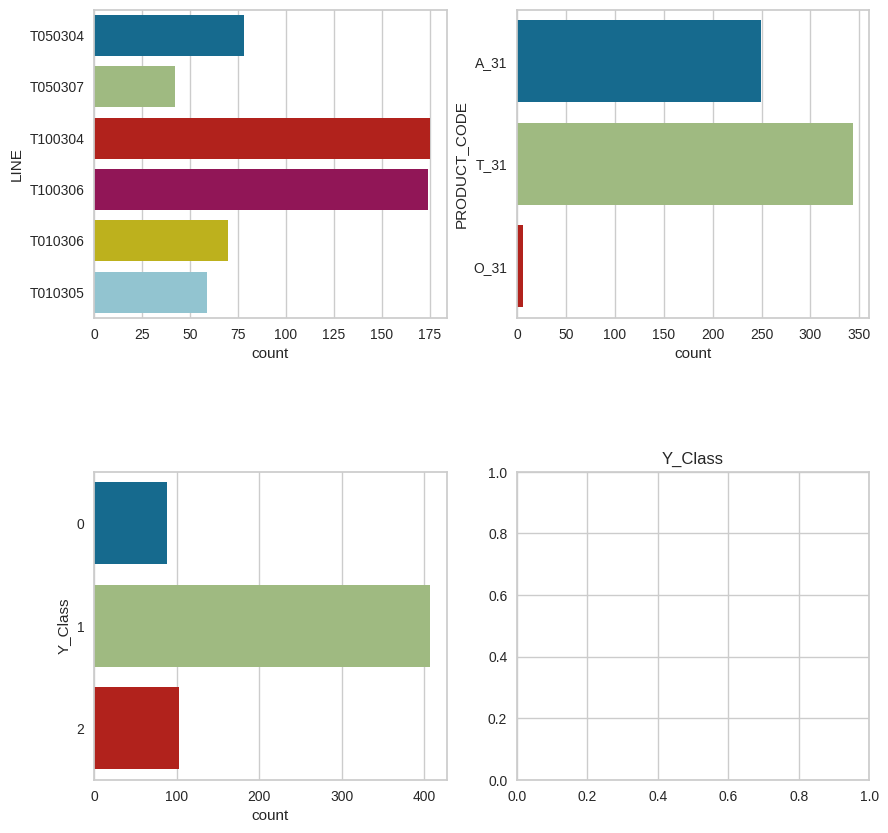

In [ ]:
column = (['Y_Class','PRODUCT_CODE','LINE'])
train1 = train[column]
categorical_feature = np.sort(list(set(train1.columns)))

fig, axs = plt.subplots(figsize = (10,10), ncols=2,nrows=2)
ax=axs.flatten()

fig.subplots_adjust(hspace=0.5)
i=0

for col in categorical_feature:
  sns.countplot(y=train[col], data=train, ax=ax[i])
  plt.title(col)
  i=i+1

plt.show()

In [ ]:
#product code별 y_class 파악
train_new = train.groupby(['Y_Class'])['PRODUCT_CODE'].value_counts().unstack(0)
train_new

Y_Class          0      1     2
PRODUCT_CODE                   
A_31          60.0  118.0  71.0
O_31           NaN    4.0   2.0
T_31          28.0  285.0  30.0

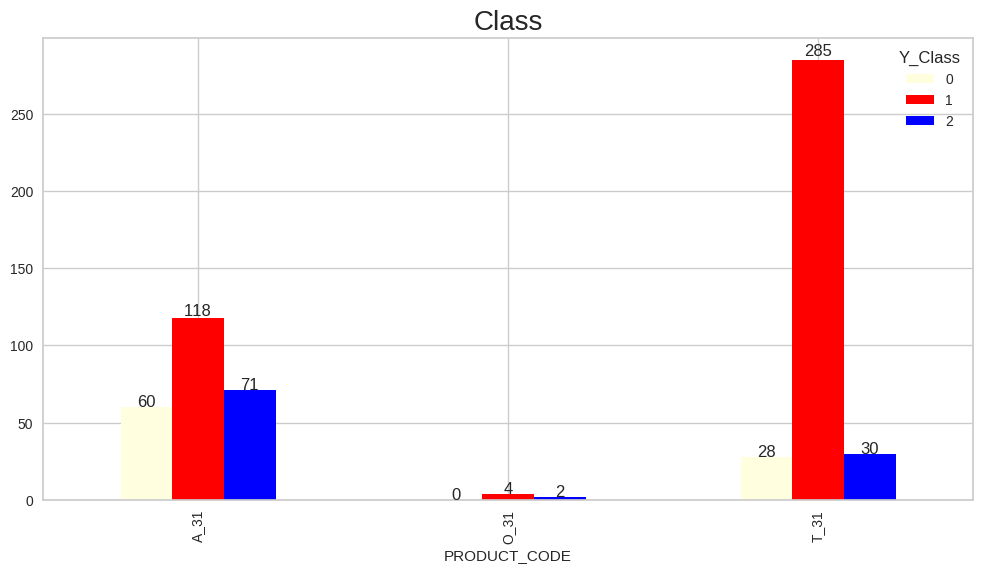

In [ ]:
ax = train_new.plot(kind='bar', color=['lightyellow', 'red','blue'] ,figsize = (12,6))

ax.set_title('Class', size=20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds #해당 막대그래프의 정보: 왼쪽, 아래, 막대그래프의 폭, 높이 정보
    ax.annotate("%.0f"%(height), (left+width/2, height*1.01), ha='center') #숫자 주석 넣기

In [ ]:
#line별 y_class 파악
train_new1 = train.groupby(['Y_Class'])['LINE'].value_counts().unstack(0)
train_new1

Y_Class   0    1   2
LINE                
T010305  13   35  11
T010306   6   37  27
T050304  30   37  11
T050307  11    9  22
T100304  17  144  14
T100306  11  145  18

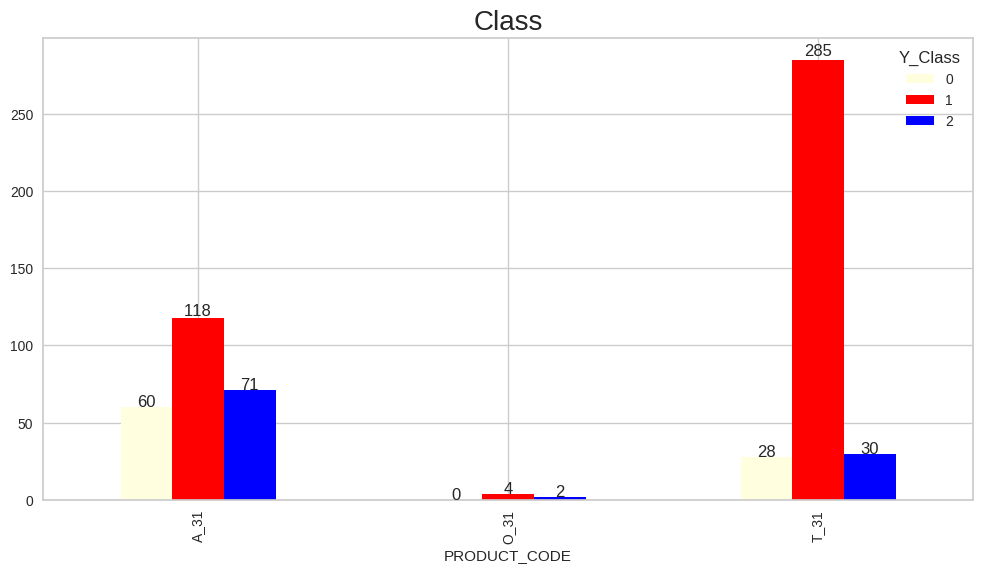

In [ ]:
ax = train_new.plot(kind='bar', color=['lightyellow', 'red','blue'] ,figsize = (12,6))

ax.set_title('Class', size=20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds #해당 막대그래프의 정보: 왼쪽, 아래, 막대그래프의 폭, 높이 정보
    ax.annotate("%.0f"%(height), (left+width/2, height*1.01), ha='center') #숫자 주석 넣기

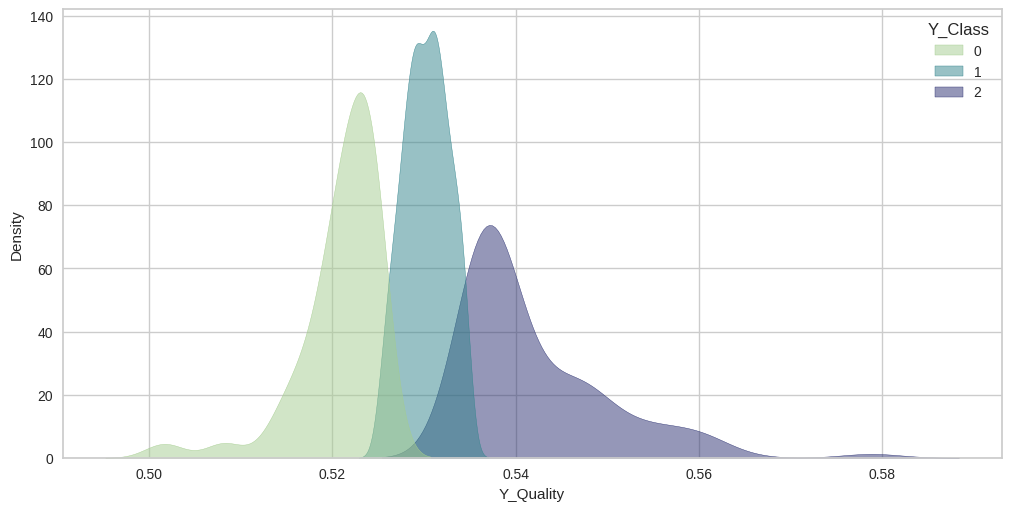

In [ ]:
#quality와 class 간 관계 파악
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)

sns.kdeplot(data=train, x='Y_Quality', hue='Y_Class', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax)

plt.show()

## 결측치 파악 plot

<Axes: >

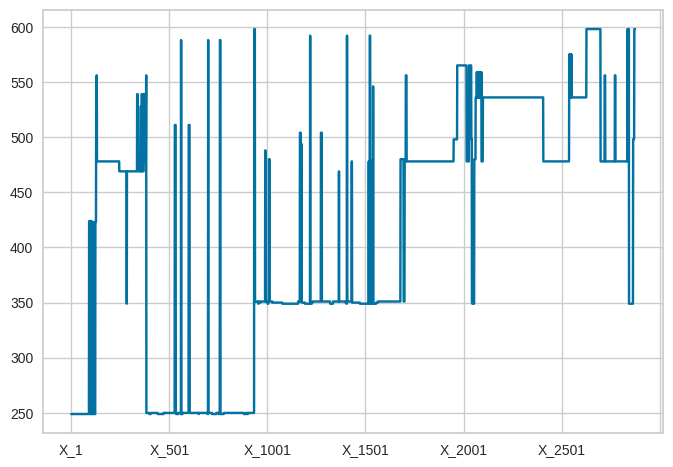

In [ ]:
#결측치 파악을 위해 dataset 재구성
train_null = train.iloc[:,6:]
train_null.isna().sum().plot()

In [ ]:
%matplotlib inline
sns.heatmap(train_null.isna(),cbar=False)

<Axes: >

결측치 내 패턴이 존재한다고 파악.

## time 관련 plot

In [ ]:
train.dtypes

PRODUCT_ID     object
Y_Class         int64
Y_Quality     float64
TIMESTAMP      object
LINE           object
               ...   
X_2871        float64
X_2872        float64
X_2873        float64
X_2874        float64
X_2875        float64
Length: 2881, dtype: object

In [ ]:
#datetime꼴로 변환해줌
newtrain = train.copy()
newtrain['TIMESTAMP'] = pd.to_datetime(train['TIMESTAMP'])

In [ ]:
newtrain = newtrain.set_index('TIMESTAMP')
column = (['Y_Class','Y_Quality'])

In [ ]:
newtrain = newtrain[column]
newtrain.plot()
plt.show()

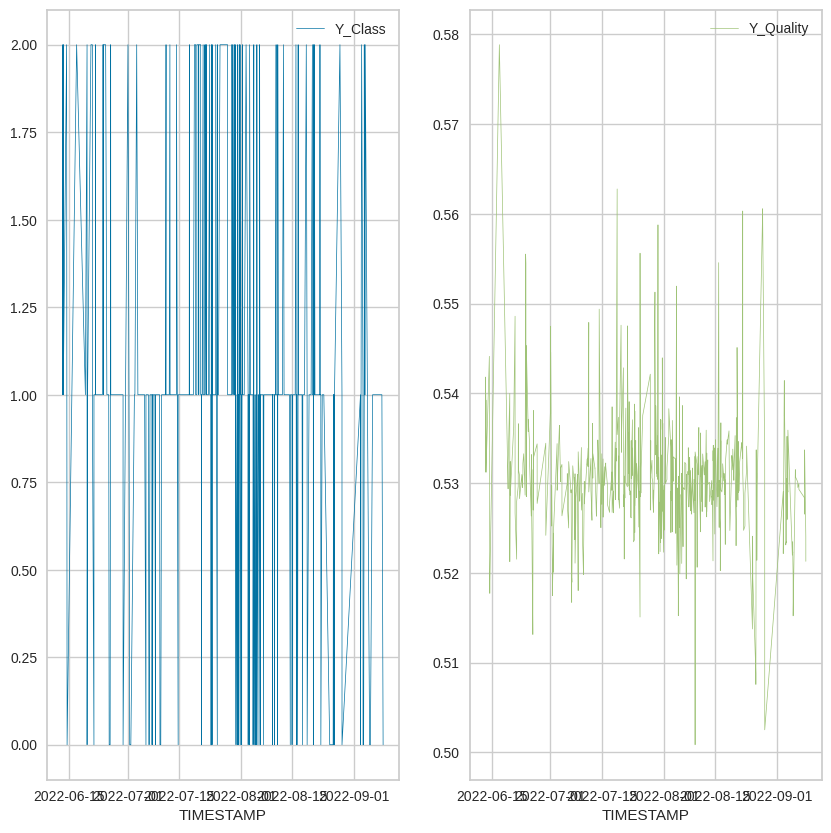

In [ ]:
newtrain.plot(subplots=True,
              linewidth=0.5,
              layout=(1,2),
              figsize=(10,10),
              sharex=False,
              sharey=False)

plt.show()

히스토그램으로 특징을 잡아보려 함.

In [ ]:
train_df = train.copy()

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37)

In [ ]:
tr_day = []
tr_hour =[]
tr_minute = []
tr_month = []

for i in range(train_df.shape[0]):
  tr_month.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').month)
  tr_day.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').day)
  tr_hour.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').hour)
  tr_minute.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').minute)

train_df['MONTH'] = tr_month
train_df['DAY'] = tr_day
train_df['HOUR'] = tr_hour
train_df['MINUTE'] = tr_minute

In [ ]:
a=[]
A = pd.DataFrame(train_df.isnull().sum(),columns=['sum'])
a = list(A[A['sum']==train_df.shape[0]].index)
train_df.drop(columns=a, inplace=True)

Text(0.5, 1.0, 'Month vs Y_Class')

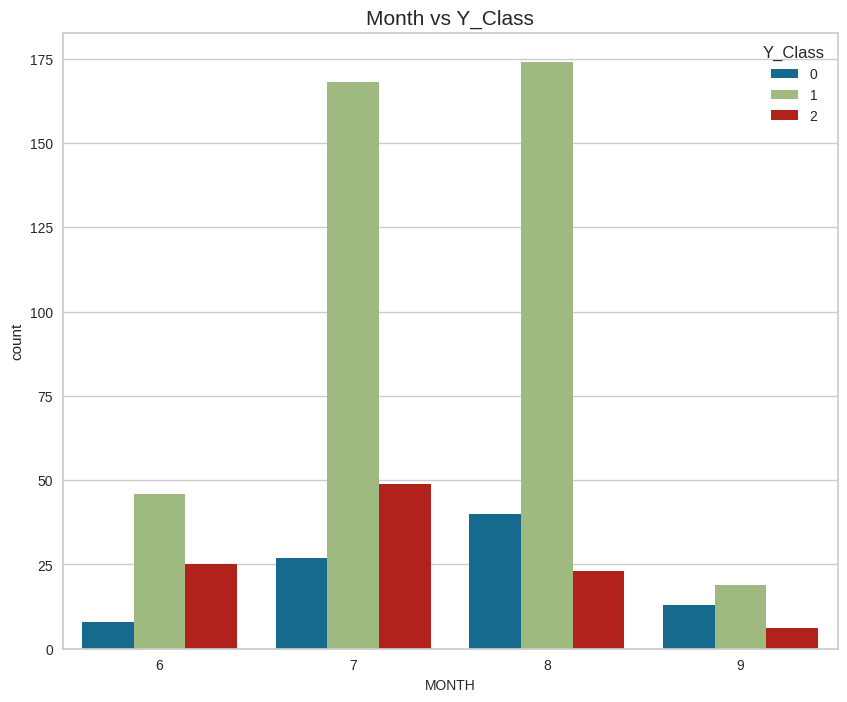

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='MONTH',hue='Y_Class',data=train_df)
plt.xlabel('MONTH',fontsize=10)
plt.title('Month vs Y_Class',fontsize=15)

Text(0.5, 1.0, 'Day vs Y_Class')

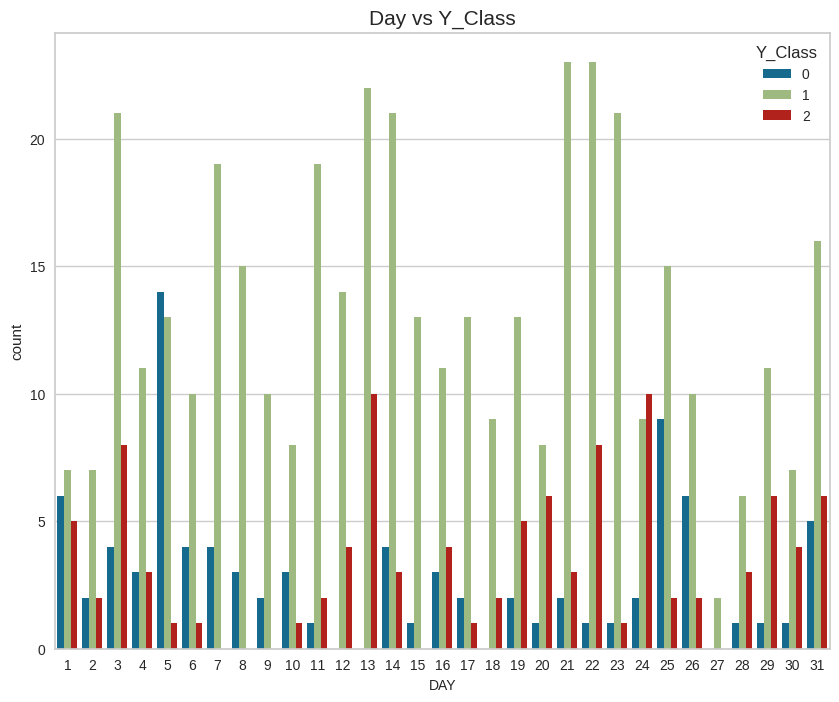

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='DAY',hue='Y_Class',data=train_df)
plt.xlabel('DAY',fontsize=10)
plt.title('Day vs Y_Class',fontsize=15)

Text(0.5, 1.0, 'Hour vs Y_Class')

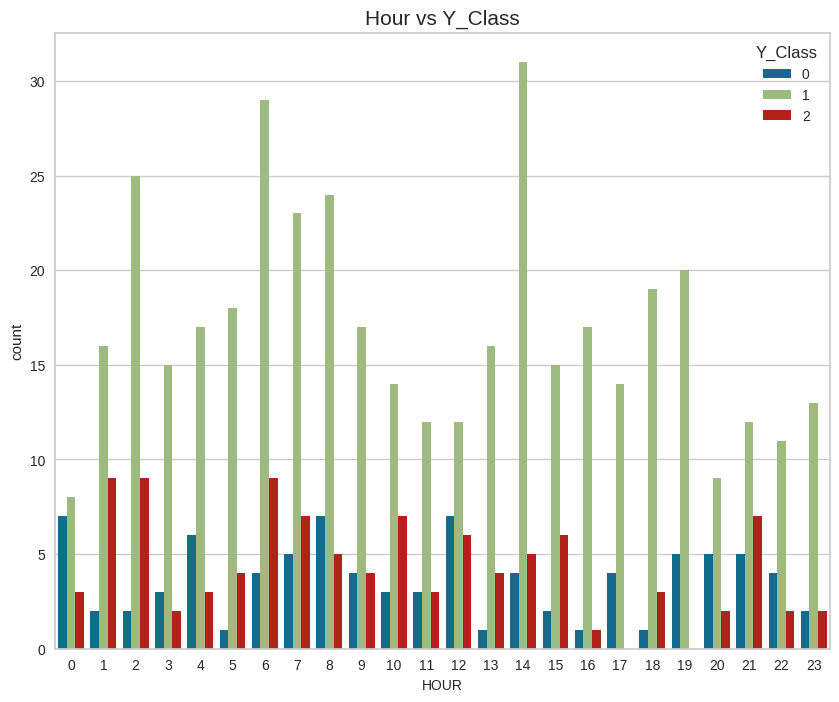

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='HOUR',hue='Y_Class',data=train_df)
plt.xlabel('HOUR',fontsize=10)
plt.title('Hour vs Y_Class',fontsize=15)

Text(0.5, 1.0, 'Minute vs Y_Class')

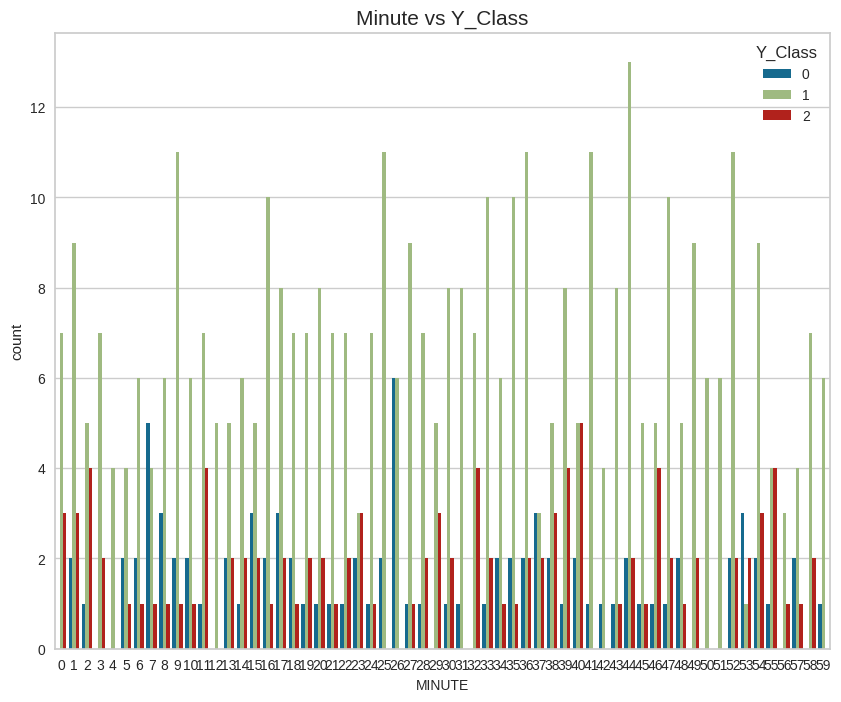

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='MINUTE',hue='Y_Class',data=train_df)
plt.xlabel('MINUTE',fontsize=10)
plt.title('Minute vs Y_Class',fontsize=15)

# file making

In [ ]:
train_month =[]
train_day = []
train_hour =[]
train_minute = []
for i in range(train.shape[0]):
  train_month.append(datetime.strptime(train.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').month)
  train_day.append(datetime.strptime(train.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').day)
  train_hour.append(datetime.strptime(train.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').hour)
  train_minute.append(datetime.strptime(train.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').minute)

train['MONTH'] = train_month
train['DAY'] = train_day
train['HOUR'] = train_hour
train['MINUTE'] = train_minute

In [ ]:
train=train.drop(columns=['TIMESTAMP'])

In [ ]:
# 모든 행이 NAN인 열 제거
col_rmv = []
col_NAN = pd.DataFrame(train.isnull().sum(),columns=['sum'])
col_rmv = list(col_NAN[col_NAN['sum']==train.shape[0]].index)
train.drop(columns=col_rmv,inplace=True)

In [ ]:
# 모든 행이 같은 값인 열 제거
col_rmv = []
for c in train.columns:
  if  train[c].nunique()==1:
    col_rmv.append(c)
train.drop(columns=col_rmv, inplace=True)

In [ ]:
# 중복된 열 제거
train.T.drop_duplicates(keep='first').T

PRODUCT_ID Y_Class Y_Quality     LINE PRODUCT_CODE   X_1   X_2   X_5  \
0    TRAIN_000       1  0.533433  T050304         A_31   NaN   NaN   NaN   
1    TRAIN_001       2  0.541819  T050307         A_31   NaN   NaN   NaN   
2    TRAIN_002       1  0.531267  T050304         A_31   NaN   NaN   NaN   
3    TRAIN_003       2  0.537325  T050307         A_31   NaN   NaN   NaN   
4    TRAIN_004       1   0.53159  T050304         A_31   NaN   NaN   NaN   
..         ...     ...       ...      ...          ...   ...   ...   ...   
593  TRAIN_593       1  0.526546  T100306         T_31   2.0  95.0  10.0   
594  TRAIN_594       0  0.524022  T050304         A_31   NaN   NaN   NaN   
595  TRAIN_595       0  0.521289  T050304         A_31   NaN   NaN   NaN   
596  TRAIN_596       1  0.531375  T100304         O_31  40.0  94.0  11.0   
597  TRAIN_597       1  0.533702  T100306         O_31  21.0  87.0  10.0   

      X_7   X_8  ... X_2837 X_2839 X_2840 X_2841    X_2842    X_2843 MONTH  \
0     NaN   NaN  ...   9.04   5.02    7.0  40.06  0.000331  0.000033     6   
1     NaN   NaN  ...    8.0    5.0   7.05  36.54   0.00115  0.000009     6   
2     NaN   NaN  ...   9.04   5.02   6.52  40.05  0.000332  0.000033     6   
3     NaN   NaN  ...   7.49   5.01   7.03  40.03   0.00121  0.000008     6   
4     NaN   NaN  ...   9.04   5.03   6.52  40.07  0.000334  0.000041     6   
..    ...   ...  ...    ...    ...    ...    ...       ...       ...   ...   
593  50.0  10.0  ...    NaN    NaN    NaN    NaN       NaN       NaN     9   
594   NaN   NaN  ...   8.51   4.99    7.0  40.59  0.000124  0.000009     9   
595   NaN   NaN  ...   8.99    5.0    7.0  40.54  0.000195  0.000009     9   
596  45.0  10.0  ...    NaN    NaN    NaN    NaN       NaN       NaN     9   
597  61.0  10.0  ...    NaN    NaN    NaN    NaN       NaN       NaN     9   

    DAY HOUR MINUTE  
0    13    5     14  
1    13    5     22  
2    13    5     30  
3    13    5     39  
4    13    5     47  
..   ..  ...    ...  
593   8   14     30  
594   8   22     38  
595   8   22     47  
596   8   14     38  
597   8   14     46  

[598 rows x 1627 columns]

In [ ]:
# 결측값의 개수가 동일한 열끼리 그룹화
missing_count = train.isnull().sum()
grouped_columns = missing_count.groupby(missing_count).groups

In [ ]:
# 그룹 기준으로 열 위치 재조정
grouped_column_names = []
for count, columns in grouped_columns.items():
    grouped_column_names.append(list(columns))  # 리스트로 변환하여 추가

grouped_column_names = [column for sublist in grouped_column_names for column in sublist]  # 중첩 리스트 해제

grouped_df = train[grouped_column_names]

<Axes: >

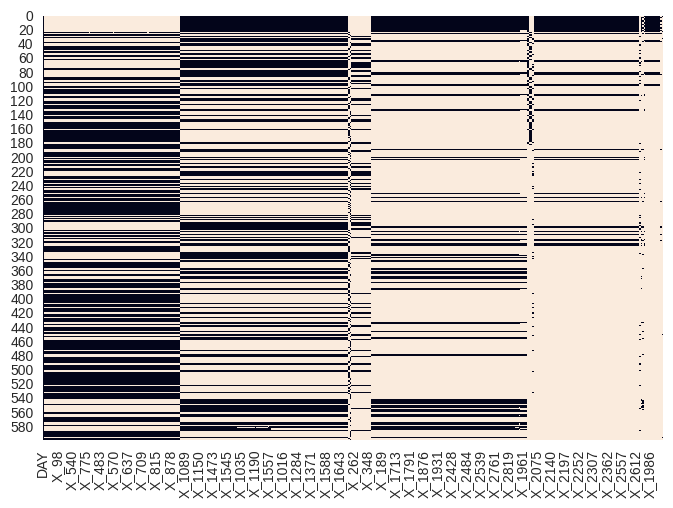

In [ ]:
# 결측치 파악을 위해 dataset 재구성
train_null = grouped_df.iloc[:,6:]
%matplotlib inline
sns.heatmap(train_null.isna(),cbar=False)

In [ ]:
# 아무 열 (여기에서는 X_121열)을 기준으로 모든 행을 오름차순으로 정렬, 그 이유는 결측값이 들어있는 행들끼리 뭉치도록 하기 위해서 -> 결측값은 가장 작은 값으로 마지막에 뭉치므로
sorted_df = train.sort_values(by='X_121', ascending=True)

<Axes: >

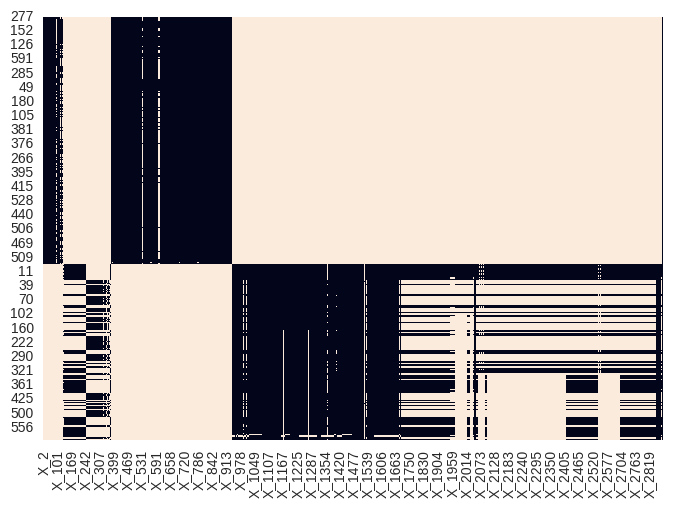

In [ ]:
train_null = sorted_df.iloc[:,6:]
%matplotlib inline
sns.heatmap(train_null.isna(),cbar=False)

heatmap 양상을 보니, X_128부터 X_380 열을 X_933 열뒤로 이동시켜야 함

In [ ]:
cols_to_move = sorted_df.loc[:, 'X_128':'X_380']
cols_to_remain = sorted_df.loc[:, 'X_938':'MINUTE']
sorted_df.drop(columns=cols_to_move.columns, inplace=True) # 기존의 위치에서 제거
sorted_df.drop(columns=cols_to_remain.columns, inplace=True)
sorted_df2 = pd.concat([sorted_df, cols_to_move, cols_to_remain], axis=1) # 지정한 위치에 추가

<Axes: >

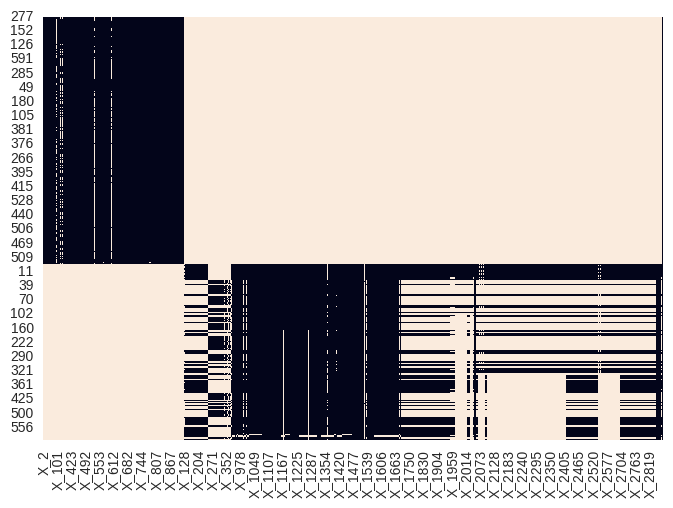

In [ ]:
train_null = sorted_df2.iloc[:,6:]
%matplotlib inline
sns.heatmap(train_null.isna(),cbar=False)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# sheet1, sheet2에 모두 공통으로 들어가야 하는 공통 열들입니다.
cols_com_head = sorted_df2.loc[:, 'PRODUCT_ID':'PRODUCT_CODE']
cols_com_tail = sorted_df2.loc[:, 'MONTH':'MINUTE']

In [ ]:
# sheet1, sheet2에 구분해서 들어가는 열 변수입니다.
tmp1 = sorted_df2.loc[:, 'X_1':'X_933']
tmp2 = sorted_df2.loc[:, 'X_128':'X_2870']

In [ ]:
sheet1 = pd.concat([cols_com_head, tmp1, cols_com_tail], axis=1)
sheet2 = pd.concat([cols_com_head, tmp2, cols_com_tail], axis=1)

In [ ]:
cols_to_check = sheet1.columns[(sheet1.columns.get_loc('X_1')):(sheet1.columns.get_loc('X_933')+1)]
sheet1 = sheet1.dropna(subset=cols_to_check, how='all')

In [ ]:
sheet1 = sheet1.sort_values(by="PRODUCT_ID")

In [ ]:
sheet1.shape

(349, 560)

In [ ]:
cols_to_check = sheet2.columns[(sheet2.columns.get_loc('X_128')):(sheet2.columns.get_loc('X_2870')+1)]
sheet2 = sheet2.dropna(subset=cols_to_check, how='all')

In [ ]:
sheet2 = sheet2.sort_values(by="PRODUCT_ID")

In [ ]:
sheet2.shape

(249, 1874)

# encoding

## sheet1

line 4가지 / product code 2가지

line - binary encoding

product code - onehotencoding

In [ ]:
#binary encoding
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
sheet1 = sheet1.reset_index()
sheet1.drop(['index'],axis=1,inplace=True)

In [ ]:
encoder1 = ce.BinaryEncoder(cols=["LINE"])
df_binary1 = encoder1.fit_transform(sheet1['LINE'])
sheet1 = pd.concat([sheet1, df_binary1], axis=1)

sheet1.head()

PRODUCT_ID  Y_Class  Y_Quality     LINE PRODUCT_CODE  X_1    X_2   X_5  \
0  TRAIN_022        0   0.517719  T100304         T_31  2.0  102.0  11.0   
1  TRAIN_023        0   0.519090  T100304         T_31  2.0  102.0  11.0   
2  TRAIN_025        1   0.529362  T100304         T_31  2.0   97.0  11.0   
3  TRAIN_026        1   0.531992  T100306         T_31  2.0   95.0  10.0   
4  TRAIN_029        1   0.532405  T100304         T_31  2.0  100.0  11.0   

    X_7   X_8   X_9   X_11   X_12   X_13  X_15   X_16   X_17   X_18   X_20  \
0  45.0  10.0  31.0  514.4  522.1  505.8   0.0  247.5  248.0  247.2  481.0   
1  45.0  10.0  31.0  514.6  522.6  506.0   0.0  247.6  248.1  247.4  481.0   
2  45.0  10.0  31.0  517.4  526.0  508.9   0.0  247.5  247.8  247.3  478.0   
3  54.0  10.0  52.0  477.4  482.4  470.2   0.0  247.5  248.1  247.3  517.0   
4  45.0  10.0  31.0  516.5  526.0  507.5   0.0  247.6  248.1  247.4  479.0   

    X_21   X_22  X_24   X_38  X_39  X_40  X_41  X_42  X_43  X_44  X_45  X_46  \
0  490.0  474.0  0.19  0.079   2.0  63.7  64.6  64.7  78.6  69.0  82.2  70.4   
1  489.0  474.0  0.19  0.079   2.0  63.7  64.6  64.7  78.6  69.0  82.2  70.4   
2  486.0  470.0  0.20  0.079   2.0  63.1  64.1  65.2  78.1  68.3  81.7  70.3   
3  526.0  513.0  0.20  0.076   2.0  66.2  67.0  66.2  78.7  71.3  82.4  74.2   
4  488.0  471.0  0.19  0.079   2.0  63.1  64.1  65.2  78.1  68.3  81.7  70.3   

   X_47  X_48  X_49  X_50  X_51  X_52  X_53  X_54  X_55  X_56  X_57  X_58  \
0  64.7  74.3  76.4  66.1  79.5  76.9  64.8  77.7  79.7  66.5  75.1  75.0   
1  64.7  74.3  76.4  66.1  79.5  76.9  64.8  77.7  79.7  66.5  75.1  75.0   
2  63.9  74.2  77.2  66.3  79.7  78.0  65.6  78.2  80.4  67.0  75.2  74.7   
3  67.7  78.0  79.6  70.2  82.5  80.2  69.0  80.3  82.8  70.1  78.4  80.2   
4  63.9  74.2  77.2  66.3  79.7  78.0  65.6  78.2  80.4  67.0  75.2  74.7   

   X_59  X_60  X_61  X_62  X_63  X_64  X_65  X_66   X_73   X_86   X_87   X_88  \
0  64.3  70.0  78.3  69.6  73.7  64.6  64.3  64.3   9.62  130.0  130.0  130.0   
1  64.3  70.0  78.3  69.6  73.7  64.6  64.3  64.3   9.62  130.0  130.0  130.0   
2  64.2  69.0  78.5  70.2  72.7  64.5  64.1  63.1   9.73  130.0  130.0  130.0   
3  67.4  74.5  79.2  73.6  74.8  66.2  66.0  65.4  10.09  129.0  129.0  129.0   
4  64.2  69.0  78.5  70.2  72.7  64.5  64.1  63.1   9.82  130.0  130.0  130.0   

   X_90  X_94  X_95     X_97     X_98     X_99     X_101     X_102     X_103  \
0  37.0   NaN   NaN  0.00130  0.00130  0.00120  0.000043  0.000057  0.000030   
1  37.0   NaN   NaN  0.00130  0.00130  0.00120  0.000042  0.000053  0.000027   
2  37.0   NaN   NaN  0.00130  0.00140  0.00130  0.000037  0.000047  0.000028   
3  36.0   0.2  0.19  0.00087  0.00088  0.00076  0.000063  0.000072  0.000044   
4  37.0   NaN   NaN  0.00130  0.00140  0.00120  0.000045  0.000074  0.000029   

      X_105     X_106     X_107     X_109     X_110         X_111  X_113  \
0  0.000010  0.000022  0.000005  0.000007  0.000029  7.700000e-07    0.2   
1  0.000009  0.000014  0.000004  0.000004  0.000005  1.200000e-06    0.2   
2  0.000007  0.000013  0.000004  0.000003  0.000007  1.700000e-06    0.2   
3  0.000013  0.000015  0.000004  0.000004  0.000004  3.200000e-06    NaN   
4  0.000010  0.000022  0.000005  0.000005  0.000018  1.700000e-06    0.2   

   X_114  X_115     X_117     X_118     X_119  X_120  X_121    X_123    X_124  \
0    0.2   0.19  0.000011  0.000015  0.000006   36.0   35.7  29062.0  11390.0   
1    0.2   0.19  0.000012  0.000021  0.000006   36.0   35.7  29067.0  11402.0   
2    0.2   0.19  0.000009  0.000017  0.000005   35.6   35.3  29656.0  12886.0   
3    NaN    NaN  0.000037  0.000038  0.000032   34.4   34.1   3968.0      NaN   
4    0.2   0.19  0.000014  0.000034  0.000006   35.3   35.0  29745.0  13107.0   

     X_125   X_126   X_127  X_384     X_385  X_386  X_387      X_388  X_389  \
0  32356.0     NaN     NaN    3.2  3.003333    2.8   74.4  73.446667   72.5   
1  32368.0     NaN     NaN    NaN       NaN    NaN    NaN     

line이 제대로 encoding되었으므로 line변수는 삭제

In [ ]:
sheet1.drop(['LINE'],axis=1,inplace=True)

In [ ]:
#onehotencoding
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe1 = OneHotEncoder(sparse=False)

ohe1.fit(sheet1[['PRODUCT_CODE']])
df_product1 = pd.DataFrame(ohe1.transform(sheet1[['PRODUCT_CODE']]), columns=['PRODUCT_CODE1', 'PRODUCT_CODE2'])

sheet1 = pd.concat([sheet1, df_product1], axis=1)

In [ ]:
sheet1.drop(['PRODUCT_CODE','MONTH','DAY','HOUR','MINUTE','PRODUCT_ID'],axis=1,inplace=True)

In [ ]:
sheet1.describe()

Y_Class   Y_Quality         X_1         X_2         X_5         X_7  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean     1.011461    0.530325    2.409742   95.123209   10.392550   48.802292   
std      0.415069    0.004735    5.895256    4.107640    0.489019    4.373824   
min      0.000000    0.502517    1.000000   87.000000   10.000000   45.000000   
25%      1.000000    0.528154    2.000000   93.000000   10.000000   45.000000   
50%      1.000000    0.530321    2.000000   95.000000   10.000000   45.000000   
75%      1.000000    0.532446    2.000000   98.000000   11.000000   51.000000   
max      2.000000    0.551279  103.000000  102.000000   11.000000   62.000000   

              X_8         X_9        X_11        X_12        X_13        X_15  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    10.048711   41.469914  497.050716  503.401433  488.307736    0.005731   
std      0.215571   10.515032   17.264680   17.975169   17.335538    0.107058   
min     10.000000   31.000000  433.900000  440.200000  424.300000    0.000000   
25%     10.000000   31.000000  487.400000  493.400000  478.500000    0.000000   
50%     10.000000   31.000000  499.900000  505.000000  489.800000    0.000000   
75%     10.000000   52.000000  509.600000  516.300000  500.900000    0.000000   
max     11.000000   52.000000  527.200000  538.000000  518.700000    2.000000   

             X_16        X_17        X_18        X_20        X_21        X_22  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean   247.542120  248.068195  247.311748  497.982808  507.375358  492.303725   
std      0.052271    0.111636    0.076222   17.745316   18.512331   18.048610   
min    247.400000  247.700000  247.100000  469.000000  478.000000  461.000000   
25%    247.500000  248.000000  247.300000  485.000000  494.000000  479.000000   
50%    247.500000  248.100000  247.300000  495.000000  505.000000  490.000000   
75%    247.600000  248.100000  247.400000  507.000000  517.000000  501.000000   
max    247.700000  248.400000  247.500000  569.000000  583.000000  562.000000   

             X_24        X_38        X_39        X_40        X_41        X_42  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean     0.191347    0.077364    1.982808   64.467049   65.559885   65.001146   
std      0.003419    0.001698    0.130173    1.450833    1.661704    1.155546   
min      0.190000    0.075000    1.000000   63.000000   63.500000   63.700000   
25%      0.190000    0.076000    2.000000   63.100000   64.100000   63.800000   
50%      0.190000    0.078000    2.000000   63.700000   65.100000   65.600000   
75%      0.190000    0.079000    2.000000   65.700000   66.800000   65.700000   
max      0.200000    0.079000    2.000000   67.300000   68.900000   67.500000   

             X_43        X_44        X_45        X_46        X_47        X_48  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    77.642120   70.273926   81.786246   71.000860   65.992837   75.460745   
std      1.219043    1.644839    0.428356    1.666824    1.814210    1.654489   
min     76.400000   68.300000   80.500000   68.700000   63.400000   73.500000   
25%     76.800000   68.600000   81.500000   69.800000   64.300000   73.600000   
50%     77.300000   69.000000   81.900000   70.700000   64.700000   74.700000   
75%     78.600000   72.000000   82.000000   72.200000   67.900000   76.900000   
max     82.000000   73.200000   82.400000   74.200000   68.100000   78.000000   

             X_49        X_50        X_51        X_52        X_53        X_54  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    77.290544   67.653009   79.652149   78.101719   66.722636   77.932951   
std      1.486509    1.983545    1.534162    1.644286    1.968875    1.415464   
min     75.600000   64.600000   77.4

## sheet2

line 2개, product code1개

product code열은 우선 모두 0으로만 변환 (삭제해도 될 거 같지만 추후 열 체크 등 혹시 모르니까)

line은 2가지라서 binary encoding, onehotencoding 동일 결과 -> binary encoding으로 통일해서 진행하겠음

In [ ]:
sheet2['PRODUCT_CODE'].value_counts()

A_31    249
Name: PRODUCT_CODE, dtype: int64

In [ ]:
sheet2['PRODUCT_CODE'] = sheet2['PRODUCT_CODE'].replace('A_31',0) #product_code 0으로 변환

In [ ]:
sheet2 = sheet2.reset_index()

In [ ]:
encoder2 = ce.BinaryEncoder(cols=["LINE"])
df_binary2 = encoder2.fit_transform(sheet2['LINE'])
sheet2 = pd.concat([sheet2, df_binary2], axis=1)

sheet2.head()

index PRODUCT_ID  Y_Class  Y_Quality     LINE  PRODUCT_CODE   X_128  \
0      0  TRAIN_000        1   0.533433  T050304             0  7813.0   
1      1  TRAIN_001        2   0.541819  T050307             0     NaN   
2      2  TRAIN_002        1   0.531267  T050304             0  7815.0   
3      3  TRAIN_003        2   0.537325  T050307             0     NaN   
4      4  TRAIN_004        1   0.531590  T050304             0  7817.0   

    X_129    X_130    X_131  X_132  X_133  X_134  X_136  X_137  X_138  X_139  \
0  7813.0      NaN      NaN   0.19   0.20   0.19  228.0  228.0  225.0  582.9   
1     NaN  19854.0  19854.0   0.20   0.21   0.20  413.0  414.0  414.0  589.3   
2  7815.0      NaN      NaN   0.19   0.20   0.19  228.0  228.0  225.0  583.8   
3     NaN  19856.0  19856.0   0.20   0.21   0.20  414.0  414.0  414.0  589.8   
4  7817.0      NaN      NaN   0.19   0.20   0.18  228.0  228.0  225.0  583.2   

   X_140  X_141  X_143   X_144   X_146  X_148  X_149  X_150  X_151  X_152  \
0  587.1  567.3    0.0  249.96  247.46  428.0  435.0  426.0  179.9  180.0   
1  595.8  575.9    0.0  249.97  249.43  423.0  433.0  419.0  179.9  180.0   
2  587.6  572.9    0.0  249.97  249.10  427.0  434.0  425.0  179.9  180.0   
3  596.1  562.2    0.0  249.97  243.26  423.0  433.0  419.0  179.9  180.0   
4  587.3  565.9    0.0  249.96  246.46  428.0  434.0  426.0  180.0  180.0   

   X_153  X_155  X_156  X_157  X_159  X_160  X_161  X_163  X_164  X_165  \
0  179.9  215.0  215.0  214.9  214.9  215.0  214.9  209.9  210.0  209.9   
1  179.8  214.9  215.1  214.8  214.9  215.0  214.9  210.0  210.0  210.0   
2  179.8  215.0  215.0  214.9  215.0  215.0  214.9  209.9  210.0  209.9   
3  179.9  215.0  215.0  214.9  215.0  215.0  214.9  210.0  210.1  210.0   
4  179.8  215.0  215.1  215.0  214.9  215.0  214.9  210.0  210.1  210.0   

   X_167  X_168  X_169  X_171  X_172  X_173  X_175  X_176  X_177  X_179  \
0  209.9  210.0  209.9  205.0  205.0  204.9  204.9  205.0  204.9  219.9   
1  210.0  210.0  209.8  204.9  205.0  204.9  204.9  205.0  204.9  219.9   
2  209.9  210.0  209.9  204.9  205.0  204.9  204.9  205.0  204.9  220.0   
3  210.0  210.0  209.9  204.9  205.0  204.9  205.0  205.0  204.9  220.0   
4  209.9  210.0  209.9  204.9  205.0  204.9  204.9  205.0  204.9  219.9   

   X_180  X_181  X_183  X_184  X_185  X_189  X_196  X_197  X_198  X_199  \
0  220.0  219.9  229.9  230.0  229.9   8.23   51.4   51.4   51.1   48.9   
1  220.0  219.9  229.9  230.0  229.9   8.00   53.8   53.8   54.0   59.4   
2  220.0  219.9  230.0  230.0  229.9   8.23   51.4   51.4   51.1   48.9   
3  220.1  220.0  229.9  230.0  229.9   8.00   53.8   53.8   54.0   59.4   
4  220.0  219.9  230.0  230.0  229.9   8.23   51.4   51.4   51.1   48.9   

   X_200  X_201  X_202  X_203  X_204  X_205  X_206  X_207  X_208  X_209  \
0   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   55.2   
1   60.7   60.7   60.4   57.4   59.2   59.2   51.6   57.7   58.5   61.0   
2   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   55.2   
3   60.7   60.7   60.4   57.4   59.2   59.2   51.6   57.7   58.5   61.0   
4   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   55.2   

   X_210  X_211  X_212  X_213  X_214  X_215  X_216  X_217  X_218  X_219  \
0   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   52.3   
1   61.0   59.8   53.6   53.8   53.8   57.0   56.7   51.2   54.4   54.4   
2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   52.3   
3   61.0   59.8   53.6   53.8   53.8   57.0   56.7   51.2   54.4   54.4   
4   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   52.3   

   X_220  X_221  X_222  X_223  X_224  X_225  X_226  X_227  X_228  X_229  \
0   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   52.6   
1   61.1   56.4   52.0   52.0   51.9   51.2   53.7   60.9   54.4   54.4   
2   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   52.6   
3   61.1   56.4   52.0   52.0   51.9   51.2   53.7   60.9  

In [ ]:
sheet2.drop(['index','LINE','PRODUCT_ID','MONTH','HOUR','MINUTE','DAY'],axis=1,inplace=True)

In [ ]:
sheet2.describe()

Y_Class   Y_Quality  PRODUCT_CODE         X_128         X_129  \
count  249.000000  249.000000         249.0     78.000000     78.000000   
mean     1.044177    0.531697           0.0  14699.833333  14791.923077   
std      0.725442    0.009965           0.0   8290.625484   8233.160897   
min      0.000000    0.500856           0.0    837.000000    837.000000   
25%      1.000000    0.525221           0.0   7827.750000   7830.500000   
50%      1.000000    0.530606           0.0  13493.500000  13493.500000   
75%      2.000000    0.536206           0.0  23426.250000  23426.250000   
max      2.000000    0.578841           0.0  26596.000000  26596.000000   

              X_130         X_131       X_132       X_133     X_134  \
count     42.000000     42.000000  120.000000  120.000000  120.0000   
mean   10904.333333  10904.333333    0.195917    0.206917    0.1950   
std     9234.859281   9234.859281    0.005103    0.004637    0.0055   
min      806.000000    806.000000    0.180000    0.200000    0.1800   
25%     2255.500000   2255.500000    0.190000    0.200000    0.1900   
50%     8513.500000   8513.500000    0.200000    0.210000    0.2000   
75%    19865.500000  19865.500000    0.200000    0.210000    0.2000   
max    26155.000000  26155.000000    0.200000    0.210000    0.2000   

            X_136       X_137       X_138       X_139       X_140       X_141  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000   
mean   392.200000  392.316667  392.066667  582.803333  588.068333  564.967500   
std    272.833024  272.634547  272.870263   13.227581   14.185174   15.292681   
min     32.000000   32.000000   32.000000  552.300000  557.200000  517.600000   
25%    171.750000  171.750000  171.750000  575.175000  578.600000  555.675000   
50%    326.500000  327.500000  327.500000  583.350000  588.250000  566.850000   
75%    664.750000  664.750000  662.500000  593.325000  600.650000  574.875000   
max    874.000000  874.000000  875.000000  607.500000  614.600000  595.300000   

            X_143       X_144       X_146       X_148       X_149       X_150  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000   
mean     0.008333  249.963833  246.265583  428.458333  436.116667  425.141667   
std      0.091287    0.007468    3.501053    9.899407    9.804118   10.357716   
min      0.000000  249.940000  230.700000  411.000000  420.000000  407.000000   
25%      0.000000  249.960000  245.617500  420.500000  427.750000  416.000000   
50%      0.000000  249.970000  247.470000  428.000000  434.000000  425.000000   
75%      0.000000  249.970000  248.512500  434.000000  441.500000  432.000000   
max      1.000000  249.970000  249.470000  452.000000  461.000000  449.000000   

            X_151       X_152       X_153       X_155       X_156       X_157  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000   
mean   179.961667  180.010833  179.865833  214.969167  215.016667  214.904167   
std      0.048824    0.042596    0.052654    0.046374    0.039606    0.037564   
min    179.900000  179.900000  179.700000  214.900000  214.900000  214.800000   
25%    179.900000  180.000000  179.800000  214.900000  215.000000  214.900000   
50%    180.000000  180.000000  179.900000  215.000000  215.000000  214.900000   
75%    180.000000  180.000000  179.900000  215.000000  215.000000  214.900000   
max    180.000000  180.100000  179.900000  215.000000  215.100000  215.000000   

            X_159       X_160       X_161       X_163       X_164      X_165  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.00000   
mean   214.952500  215.020000  214.910833  209.978333  210.030833  209.95000   
std      0.050147    0.040168    0.036197    0.041370    0.046374    0.05021   
min    214.900000  215.000000  214.800000  209.900000  210.000000  209.90000   
25%    214.900000  215.000000  214.900000  210.000000  210.000000  209.90000   
50%    215.000000  215.0

# 결측치 대체

## sheet1

In [ ]:
#같은 값으로 대체되는 게 많으면 차원축소하더라도 이 변수가 끼치는 영향력이 적다고 판단.
#subset2와 동일한 기준 (결측치가 70% 이상인 변수 삭제)
sheet1.shape[0] * 0.7

244.29999999999998

In [ ]:
sheet1.loc[:,(sheet1.isna().sum() >= 244)].columns

Index(['X_529', 'X_530', 'X_531', 'X_532', 'X_533', 'X_600', 'X_601', 'X_602',
       'X_603', 'X_604', 'X_699'],
      dtype='object')

In [ ]:
col = sheet1.loc[:,(sheet1.isna().sum() >= 244)].columns
sheet1.drop(col,axis=1,inplace=True)

In [ ]:
%matplotlib inline
sns.heatmap(sheet1.isna(),cbar=False)

<Axes: >

In [ ]:
sheet1 = sheet1.fillna(sheet1.median())

In [ ]:
np.sort(sheet1.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## sheet2

In [ ]:
col2 = sheet2.loc[:,(sheet2.isna().sum() >= 170)].columns
sheet2.drop(col2,axis=1,inplace=True)

In [ ]:
sheet2 = sheet2.fillna(sheet2.median())

In [ ]:
np.sort(sheet2.isna().sum())

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

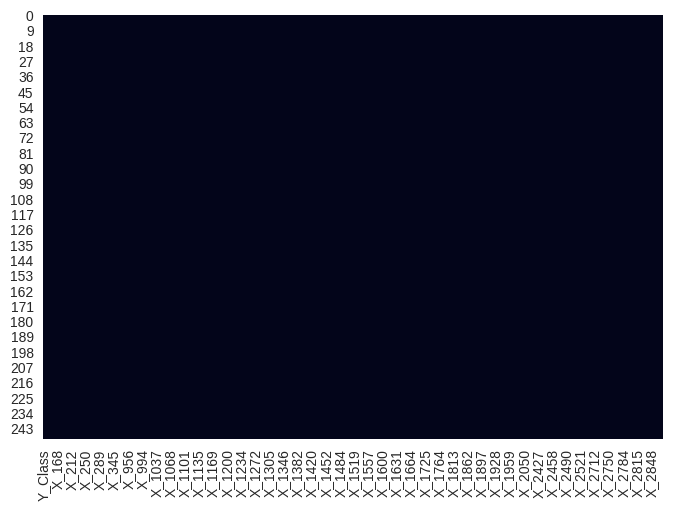

In [ ]:
%matplotlib inline
sns.heatmap(sheet2.isna(),cbar=False)

# Scaling 및 outlier 처리

## sheet1

### outlier 처리

In [ ]:
numeric1 = sheet1.drop(['Y_Class','Y_Quality'],axis=1)

In [ ]:
def replace_outliers(data, column_name, lower_percentile=0.5, upper_percentile=99.5):
  if column_name in data.columns and not data[column_name].isnull().all():
    lower_threshold = np.percentile(data[column_name], lower_percentile)
    upper_threshold = np.percentile(data[column_name], upper_percentile)
    data[column_name] = np.where(data[column_name] < lower_threshold, np.percentile(data[column_name], lower_percentile),data[column_name])
    data[column_name] = np.where(data[column_name] > upper_threshold, np.percentile(data[column_name], upper_percentile), data[column_name])

    return data

lower_percentile = 0.5  # 대체할 하한 이상치의 백분위수
upper_percentile = 99.5  # 대체할 상한 이상치의 백분위수
for column in numeric1.columns:
    numeric1 = replace_outliers(numeric1, column, lower_percentile, upper_percentile)

In [ ]:
sheet1.shape

(349, 546)

In [ ]:
sheet1.head()

Y_Class  Y_Quality  X_1    X_2   X_5   X_7   X_8   X_9   X_11   X_12  \
0        0   0.517719  2.0  102.0  11.0  45.0  10.0  31.0  514.4  522.1   
1        0   0.519090  2.0  102.0  11.0  45.0  10.0  31.0  514.6  522.6   
2        1   0.529362  2.0   97.0  11.0  45.0  10.0  31.0  517.4  526.0   
3        1   0.531992  2.0   95.0  10.0  54.0  10.0  52.0  477.4  482.4   
4        1   0.532405  2.0  100.0  11.0  45.0  10.0  31.0  516.5  526.0   

    X_13  X_15   X_16   X_17   X_18   X_20   X_21   X_22  X_24   X_38  X_39  \
0  505.8   0.0  247.5  248.0  247.2  481.0  490.0  474.0  0.19  0.079   2.0   
1  506.0   0.0  247.6  248.1  247.4  481.0  489.0  474.0  0.19  0.079   2.0   
2  508.9   0.0  247.5  247.8  247.3  478.0  486.0  470.0  0.20  0.079   2.0   
3  470.2   0.0  247.5  248.1  247.3  517.0  526.0  513.0  0.20  0.076   2.0   
4  507.5   0.0  247.6  248.1  247.4  479.0  488.0  471.0  0.19  0.079   2.0   

   X_40  X_41  X_42  X_43  X_44  X_45  X_46  X_47  X_48  X_49  X_50  X_51  \
0  63.7  64.6  64.7  78.6  69.0  82.2  70.4  64.7  74.3  76.4  66.1  79.5   
1  63.7  64.6  64.7  78.6  69.0  82.2  70.4  64.7  74.3  76.4  66.1  79.5   
2  63.1  64.1  65.2  78.1  68.3  81.7  70.3  63.9  74.2  77.2  66.3  79.7   
3  66.2  67.0  66.2  78.7  71.3  82.4  74.2  67.7  78.0  79.6  70.2  82.5   
4  63.1  64.1  65.2  78.1  68.3  81.7  70.3  63.9  74.2  77.2  66.3  79.7   

   X_52  X_53  X_54  X_55  X_56  X_57  X_58  X_59  X_60  X_61  X_62  X_63  \
0  76.9  64.8  77.7  79.7  66.5  75.1  75.0  64.3  70.0  78.3  69.6  73.7   
1  76.9  64.8  77.7  79.7  66.5  75.1  75.0  64.3  70.0  78.3  69.6  73.7   
2  78.0  65.6  78.2  80.4  67.0  75.2  74.7  64.2  69.0  78.5  70.2  72.7   
3  80.2  69.0  80.3  82.8  70.1  78.4  80.2  67.4  74.5  79.2  73.6  74.8   
4  78.0  65.6  78.2  80.4  67.0  75.2  74.7  64.2  69.0  78.5  70.2  72.7   

   X_64  X_65  X_66   X_73   X_86   X_87   X_88  X_90  X_94  X_95     X_97  \
0  64.6  64.3  64.3   9.62  130.0  130.0  130.0  37.0  0.19  0.19  0.00130   
1  64.6  64.3  64.3   9.62  130.0  130.0  130.0  37.0  0.19  0.19  0.00130   
2  64.5  64.1  63.1   9.73  130.0  130.0  130.0  37.0  0.19  0.19  0.00130   
3  66.2  66.0  65.4  10.09  129.0  129.0  129.0  36.0  0.20  0.19  0.00087   
4  64.5  64.1  63.1   9.82  130.0  130.0  130.0  37.0  0.19  0.19  0.00130   

      X_98     X_99     X_101     X_102     X_103     X_105     X_106  \
0  0.00130  0.00120  0.000043  0.000057  0.000030  0.000010  0.000022   
1  0.00130  0.00120  0.000042  0.000053  0.000027  0.000009  0.000014   
2  0.00140  0.00130  0.000037  0.000047  0.000028  0.000007  0.000013   
3  0.00088  0.00076  0.000063  0.000072  0.000044  0.000013  0.000015   
4  0.00140  0.00120  0.000045  0.000074  0.000029  0.000010  0.000022   

      X_107     X_109     X_110         X_111  X_113  X_114  X_115     X_117  \
0  0.000005  0.000007  0.000029  7.700000e-07   0.20    0.2   0.19  0.000011   
1  0.000004  0.000004  0.000005  1.200000e-06   0.20    0.2   0.19  0.000012   
2  0.000004  0.000003  0.000007  1.700000e-06   0.20    0.2   0.19  0.000009   
3  0.000004  0.000004  0.000004  3.200000e-06   0.19    0.2   0.19  0.000037   
4  0.000005  0.000005  0.000018  1.700000e-06   0.20    0.2   0.19  0.000014   

      X_118     X_119  X_120  X_121    X_123    X_124    X_125    X_126  \
0  0.000015  0.000006   36.0   35.7  29062.0  11390.0  32356.0  15126.5   
1  0.000021  0.000006   36.0   35.7  29067.0  11402.0  32368.0  15126.5   
2  0.000017  0.000005   35.6   35.3  29656.0  12886.0  33852.0  15126.5   
3  0.000038  0.000032   34.4   34.1   3968.0  17386.0  18478.0   2251.0   
4  0.000034  0.000006   35.3   35.0  29745.0  13107.0  34073.0  15126.5   

     X_127  X_384     X_385  X_386  X_387      X_388  X_389  X_393  X_394  \
0  18922.0    3.2  3.003333    2.8   74.4  73.446667   72.5    0.0  -60.0   
1  18922.0    3.1  2.927849    2.7   75.1  74.031183   73.0   10.0  -10.0   
2  18922.0    4.1  3.812903    3.6   78.2  75.212903   74.1   10.0  -30.0   
3  

In [ ]:
numeric1 = sheet1.iloc[:,2:542]

In [ ]:
numeric1.head()

X_1    X_2   X_5   X_7   X_8   X_9   X_11   X_12   X_13  X_15   X_16  \
0  2.0  102.0  11.0  45.0  10.0  31.0  514.4  522.1  505.8   0.0  247.5   
1  2.0  102.0  11.0  45.0  10.0  31.0  514.6  522.6  506.0   0.0  247.6   
2  2.0   97.0  11.0  45.0  10.0  31.0  517.4  526.0  508.9   0.0  247.5   
3  2.0   95.0  10.0  54.0  10.0  52.0  477.4  482.4  470.2   0.0  247.5   
4  2.0  100.0  11.0  45.0  10.0  31.0  516.5  526.0  507.5   0.0  247.6   

    X_17   X_18   X_20   X_21   X_22  X_24   X_38  X_39  X_40  X_41  X_42  \
0  248.0  247.2  481.0  490.0  474.0  0.19  0.079   2.0  63.7  64.6  64.7   
1  248.1  247.4  481.0  489.0  474.0  0.19  0.079   2.0  63.7  64.6  64.7   
2  247.8  247.3  478.0  486.0  470.0  0.20  0.079   2.0  63.1  64.1  65.2   
3  248.1  247.3  517.0  526.0  513.0  0.20  0.076   2.0  66.2  67.0  66.2   
4  248.1  247.4  479.0  488.0  471.0  0.19  0.079   2.0  63.1  64.1  65.2   

   X_43  X_44  X_45  X_46  X_47  X_48  X_49  X_50  X_51  X_52  X_53  X_54  \
0  78.6  69.0  82.2  70.4  64.7  74.3  76.4  66.1  79.5  76.9  64.8  77.7   
1  78.6  69.0  82.2  70.4  64.7  74.3  76.4  66.1  79.5  76.9  64.8  77.7   
2  78.1  68.3  81.7  70.3  63.9  74.2  77.2  66.3  79.7  78.0  65.6  78.2   
3  78.7  71.3  82.4  74.2  67.7  78.0  79.6  70.2  82.5  80.2  69.0  80.3   
4  78.1  68.3  81.7  70.3  63.9  74.2  77.2  66.3  79.7  78.0  65.6  78.2   

   X_55  X_56  X_57  X_58  X_59  X_60  X_61  X_62  X_63  X_64  X_65  X_66  \
0  79.7  66.5  75.1  75.0  64.3  70.0  78.3  69.6  73.7  64.6  64.3  64.3   
1  79.7  66.5  75.1  75.0  64.3  70.0  78.3  69.6  73.7  64.6  64.3  64.3   
2  80.4  67.0  75.2  74.7  64.2  69.0  78.5  70.2  72.7  64.5  64.1  63.1   
3  82.8  70.1  78.4  80.2  67.4  74.5  79.2  73.6  74.8  66.2  66.0  65.4   
4  80.4  67.0  75.2  74.7  64.2  69.0  78.5  70.2  72.7  64.5  64.1  63.1   

    X_73   X_86   X_87   X_88  X_90  X_94  X_95     X_97     X_98     X_99  \
0   9.62  130.0  130.0  130.0  37.0  0.19  0.19  0.00130  0.00130  0.00120   
1   9.62  130.0  130.0  130.0  37.0  0.19  0.19  0.00130  0.00130  0.00120   
2   9.73  130.0  130.0  130.0  37.0  0.19  0.19  0.00130  0.00140  0.00130   
3  10.09  129.0  129.0  129.0  36.0  0.20  0.19  0.00087  0.00088  0.00076   
4   9.82  130.0  130.0  130.0  37.0  0.19  0.19  0.00130  0.00140  0.00120   

      X_101     X_102     X_103     X_105     X_106     X_107     X_109  \
0  0.000043  0.000057  0.000030  0.000010  0.000022  0.000005  0.000007   
1  0.000042  0.000053  0.000027  0.000009  0.000014  0.000004  0.000004   
2  0.000037  0.000047  0.000028  0.000007  0.000013  0.000004  0.000003   
3  0.000063  0.000072  0.000044  0.000013  0.000015  0.000004  0.000004   
4  0.000045  0.000074  0.000029  0.000010  0.000022  0.000005  0.000005   

      X_110         X_111  X_113  X_114  X_115     X_117     X_118     X_119  \
0  0.000029  7.700000e-07   0.20    0.2   0.19  0.000011  0.000015  0.000006   
1  0.000005  1.200000e-06   0.20    0.2   0.19  0.000012  0.000021  0.000006   
2  0.000007  1.700000e-06   0.20    0.2   0.19  0.000009  0.000017  0.000005   
3  0.000004  3.200000e-06   0.19    0.2   0.19  0.000037  0.000038  0.000032   
4  0.000018  1.700000e-06   0.20    0.2   0.19  0.000014  0.000034  0.000006   

   X_120  X_121    X_123    X_124    X_125    X_126    X_127  X_384     X_385  \
0   36.0   35.7  29062.0  11390.0  32356.0  15126.5  18922.0    3.2  3.003333   
1   36.0   35.7  29067.0  11402.0  32368.0  15126.5  18922.0    3.1  2.927849   
2   35.6   35.3  29656.0  12886.0  33852.0  15126.5  18922.0    4.1  3.812903   
3   34.4   34.1   3968.0  17386.0  18478.0   2251.0   6047.0    4.1  3.729032   
4   35.3   35.0  29745.0  13107.0  34073.0  15126.5  18922.0    3.9  3.690323   

   X_386  X_387      X_388  X_389  X_393  X_394  X_395  X_396      X_397  \
0    2.8   74.4  73.446667   72.5    0.0  -60.0   20.0  -70.0  30.050000   
1    2.7   75.1  74.031183   73.0   10.0  -10.0  -10.0  -70.0  29.916129   
2    3.6   78.2  75.212903   74.1   10.0  -30.0

In [ ]:
sheet1.describe()

Y_Class   Y_Quality         X_1         X_2         X_5         X_7  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean     1.011461    0.530325    2.409742   95.123209   10.392550   48.802292   
std      0.415069    0.004735    5.895256    4.107640    0.489019    4.373824   
min      0.000000    0.502517    1.000000   87.000000   10.000000   45.000000   
25%      1.000000    0.528154    2.000000   93.000000   10.000000   45.000000   
50%      1.000000    0.530321    2.000000   95.000000   10.000000   45.000000   
75%      1.000000    0.532446    2.000000   98.000000   11.000000   51.000000   
max      2.000000    0.551279  103.000000  102.000000   11.000000   62.000000   

              X_8         X_9        X_11        X_12        X_13        X_15  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    10.048711   41.469914  497.050716  503.401433  488.307736    0.005731   
std      0.215571   10.515032   17.264680   17.975169   17.335538    0.107058   
min     10.000000   31.000000  433.900000  440.200000  424.300000    0.000000   
25%     10.000000   31.000000  487.400000  493.400000  478.500000    0.000000   
50%     10.000000   31.000000  499.900000  505.000000  489.800000    0.000000   
75%     10.000000   52.000000  509.600000  516.300000  500.900000    0.000000   
max     11.000000   52.000000  527.200000  538.000000  518.700000    2.000000   

             X_16        X_17        X_18        X_20        X_21        X_22  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean   247.542120  248.068195  247.311748  497.982808  507.375358  492.303725   
std      0.052271    0.111636    0.076222   17.745316   18.512331   18.048610   
min    247.400000  247.700000  247.100000  469.000000  478.000000  461.000000   
25%    247.500000  248.000000  247.300000  485.000000  494.000000  479.000000   
50%    247.500000  248.100000  247.300000  495.000000  505.000000  490.000000   
75%    247.600000  248.100000  247.400000  507.000000  517.000000  501.000000   
max    247.700000  248.400000  247.500000  569.000000  583.000000  562.000000   

             X_24        X_38        X_39        X_40        X_41        X_42  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean     0.191347    0.077364    1.982808   64.467049   65.559885   65.001146   
std      0.003419    0.001698    0.130173    1.450833    1.661704    1.155546   
min      0.190000    0.075000    1.000000   63.000000   63.500000   63.700000   
25%      0.190000    0.076000    2.000000   63.100000   64.100000   63.800000   
50%      0.190000    0.078000    2.000000   63.700000   65.100000   65.600000   
75%      0.190000    0.079000    2.000000   65.700000   66.800000   65.700000   
max      0.200000    0.079000    2.000000   67.300000   68.900000   67.500000   

             X_43        X_44        X_45        X_46        X_47        X_48  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    77.642120   70.273926   81.786246   71.000860   65.992837   75.460745   
std      1.219043    1.644839    0.428356    1.666824    1.814210    1.654489   
min     76.400000   68.300000   80.500000   68.700000   63.400000   73.500000   
25%     76.800000   68.600000   81.500000   69.800000   64.300000   73.600000   
50%     77.300000   69.000000   81.900000   70.700000   64.700000   74.700000   
75%     78.600000   72.000000   82.000000   72.200000   67.900000   76.900000   
max     82.000000   73.200000   82.400000   74.200000   68.100000   78.000000   

             X_49        X_50        X_51        X_52        X_53        X_54  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    77.290544   67.653009   79.652149   78.101719   66.722636   77.932951   
std      1.486509    1.983545    1.534162    1.644286    1.968875    1.415464   
min     75.600000   64.600000   77.4

### 정규성 검정

In [ ]:
#검정을 위한 데이터셋
normal1 = sheet1.drop(['LINE_0','LINE_1','PRODUCT_CODE1','PRODUCT_CODE2','Y_Class','Y_Quality'],axis=1)

In [ ]:
from scipy.stats import shapiro
result_shapiro1 = []
for i in normal1.columns:
  result_shapiro1.append(shapiro(normal1[i]))

In [ ]:
result_shapiro1

[ShapiroResult(statistic=0.08180117607116699, pvalue=9.02092444485914e-38),
 ShapiroResult(statistic=0.9605873227119446, pvalue=4.4246064589970047e-08),
 ShapiroResult(statistic=0.619489312171936, pvalue=4.576378556041417e-27),
 ShapiroResult(statistic=0.806420624256134, pvalue=4.0454353531459794e-20),
 ShapiroResult(statistic=0.22014325857162476, pvalue=1.2053352908480875e-35),
 ShapiroResult(statistic=0.6365028619766235, pvalue=1.4633619392370562e-26),
 ShapiroResult(statistic=0.9541926980018616, pvalue=5.838103334099287e-09),
 ShapiroResult(statistic=0.9657711982727051, pvalue=2.64510674696794e-07),
 ShapiroResult(statistic=0.9522159695625305, pvalue=3.232291323485015e-09),
 ShapiroResult(statistic=0.028271913528442383, pvalue=1.5943697871290297e-38),
 ShapiroResult(statistic=0.6845278739929199, pvalue=4.98001578578783e-25),
 ShapiroResult(statistic=0.8935938477516174, pvalue=6.960140454839682e-15),
 ShapiroResult(statistic=0.8466519117355347, pvalue=5.588674168737427e-18),
 Shapiro

In [ ]:
from scipy.stats import kstest
ks_result1 = []
for i in normal1.columns:
  ks_result1.append(kstest(normal1[i], 'norm'))

In [ ]:
ks_result1

[KstestResult(statistic=0.8597713580231675, pvalue=1.5886061966755158e-297, statistic_location=2.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=87.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=45.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=31.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=433.9, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=440.2, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=424.3, statistic_sign=-1),
 KstestResult(statistic=0.5, pvalue=3.3226184940018834e-81, statistic_location=0.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=247.4, statistic_sign=-1)

### train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X1 = sheet1.drop(['Y_Class','Y_Quality'],axis=1)
y1 = sheet1['Y_Class']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1234)

In [ ]:
X1_train.head()

X_1   X_2   X_5   X_7   X_8   X_9   X_11   X_12   X_13  X_15   X_16  \
110  2.0  94.0  10.0  53.0  10.0  52.0  490.1  496.4  479.3   0.0  247.6   
146  2.0  89.0  10.0  51.0  10.0  52.0  494.0  501.6  482.7   0.0  247.6   
179  2.0  96.0  10.0  54.0  10.0  52.0  501.1  508.4  489.5   0.0  247.6   
209  2.0  95.0  10.0  54.0  10.0  52.0  504.2  512.6  493.2   0.0  247.6   
257  2.0  95.0  10.0  51.0  10.0  52.0  508.4  516.3  496.1   0.0  247.6   

      X_17   X_18   X_20   X_21   X_22  X_24   X_38  X_39  X_40  X_41  X_42  \
110  248.0  247.5  504.0  516.0  498.0  0.19  0.075   2.0  65.7  66.7  65.7   
146  248.1  247.3  500.0  513.0  493.0  0.19  0.075   2.0  65.7  66.7  65.7   
179  248.1  247.2  493.0  506.0  487.0  0.20  0.075   2.0  65.2  66.9  65.6   
209  248.0  247.3  490.0  502.0  483.0  0.19  0.076   2.0  65.2  66.9  65.6   
257  248.0  247.3  486.0  498.0  479.0  0.19  0.077   2.0  65.2  66.8  65.7   

     X_43  X_44  X_45  X_46  X_47  X_48  X_49  X_50  X_51  X_52  X_53  X_54  \
110  77.3  72.1  82.0  72.7  68.0  77.2  79.0  69.9  81.2  79.9  69.0  79.0   
146  77.3  72.1  82.0  72.7  68.0  77.2  79.0  69.9  81.2  79.9  69.0  79.0   
179  76.8  72.0  81.9  72.2  67.9  76.9  78.9  69.4  80.8  80.0  68.6  78.6   
209  76.8  72.0  81.9  72.2  67.9  76.9  78.9  69.4  80.8  80.0  68.6  78.6   
257  76.8  72.0  81.9  72.1  67.9  76.8  78.8  69.5  80.7  79.9  68.5  78.5   

     X_55  X_56  X_57  X_58  X_59  X_60  X_61  X_62  X_63  X_64  X_65  X_66  \
110  82.1  70.4  76.5  76.9  65.8  70.8  78.6  77.4  73.7  65.3  66.4  64.6   
146  82.1  70.4  76.5  75.9  65.8  69.8  78.6  78.4  73.7  65.3  66.4  64.6   
179  82.0  70.9  75.5  75.7  65.0  69.4  78.2  79.4  72.9  65.1  66.7  64.3   
209  82.0  70.9  75.5  75.7  65.0  69.4  78.2  79.4  72.9  65.1  66.7  64.3   
257  82.0  71.0  75.4  75.6  65.1  69.3  78.3  79.5  72.9  65.2  66.7  64.3   

      X_73   X_86   X_87   X_88  X_90  X_94  X_95     X_97     X_98     X_99  \
110  10.03  129.0  129.0  129.0  36.0  0.19  0.19  0.00080  0.00082  0.00075   
146   9.97  129.0  129.0  129.0  36.0  0.19  0.19  0.00079  0.00080  0.00073   
179  10.03  129.0  129.0  129.0  36.0  0.19  0.19  0.00078  0.00079  0.00072   
209   9.91  129.0  129.0  129.0  36.0  0.19  0.18  0.00077  0.00078  0.00072   
257   9.85  129.0  129.0  129.0  36.0  0.19  0.19  0.00077  0.00079  0.00072   

        X_101     X_102     X_103     X_105     X_106     X_107     X_109  \
110  0.000063  0.000074  0.000040  0.000010  0.000013  0.000003  0.000003   
146  0.000059  0.000069  0.000042  0.000009  0.000011  0.000003  0.000003   
179  0.000054  0.000063  0.000039  0.000007  0.000008  0.000003  0.000004   
209  0.000056  0.000065  0.000040  0.000006  0.000009  0.000002  0.000003   
257  0.000058  0.000068  0.000042  0.000007  0.000008  0.000003  0.000003   

        X_110     X_111  X_113  X_114  X_115     X_117     X_118     X_119  \
110  0.000004  0.000003   0.19    0.2   0.19  0.000033  0.000034  0.000030   
146  0.000005  0.000003   0.19    0.2   0.19  0.000033  0.000035  0.000032   
179  0.000005  0.000003   0.19    0.2   0.19  0.000032  0.000034  0.000030   
209  0.000005  0.000003   0.19    0.2   0.19  0.000033  0.000034  0.000031   
257  0.000004  0.000003   0.19    0.2   0.19  0.000033  0.000035  0.000030   

     X_120  X_121    X_123    X_124    X_125    X_126    X_127  X_384  \
110   34.6   34.3   9089.0  17386.0  18478.0  14481.0  18277.0    3.4   
146   34.8   34.5  10917.0  17386.0  18478.0  18720.0  22516.0    3.4   
179   34.6   34.3  12198.0  17386.0  18478.0  21823.0  25618.0    3.0   
209   35.0   34.7  13619.0  17386.0  18478.0  25275.0  29070.0    3.1   
257   35.2   34.9  16064.0  17386.0  18478.0  31133.0  34929.0    2.9   

        X_385  X_386  X_387      X_388  X_389  X_393  X_394  X_395  X_396  \
110  3.133333    2.8   75.2  74.326667   73.3    0.0  -40.0   20.0  -70.0   
146  3.061290    2.8   75.4  74.722581   73.7    0.0  -60.0  -10.0  -70.0   
179  2.787097    2.6   74.4  73.309677  

### robust scaler & minmax scaler

In [ ]:
#numerical만 진행하므로 normal data set사용
from sklearn.preprocessing import RobustScaler

rob1 = RobustScaler()
numeric1 = X1_train.drop(['LINE_0','LINE_1','PRODUCT_CODE1','PRODUCT_CODE2'],axis=1)
rob_data1 = pd.DataFrame(rob1.fit_transform(numeric1))
rob_data1.columns = numeric1.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm1 = MinMaxScaler()
mm1_data = pd.DataFrame(mm1.fit_transform(rob_data1))
mm1_data.columns = rob_data1.columns

In [ ]:
numeric1_test = X1_test.drop(['LINE_0','LINE_1','PRODUCT_CODE1','PRODUCT_CODE2'],axis=1)
x1_test_scale = pd.DataFrame(rob1.transform(numeric1_test))
x1_test_scale.columns = numeric1_test.columns
x1_test = pd.DataFrame(mm1.transform(x1_test_scale))
x1_test.columns = x1_test_scale.columns

## sheet2

### outlier 처리

In [ ]:
sheet2.head()

Y_Class  Y_Quality  PRODUCT_CODE  X_132  X_133  X_134  X_136  X_137  X_138  \
0        1   0.533433             0   0.19   0.20   0.19  228.0  228.0  225.0   
1        2   0.541819             0   0.20   0.21   0.20  413.0  414.0  414.0   
2        1   0.531267             0   0.19   0.20   0.19  228.0  228.0  225.0   
3        2   0.537325             0   0.20   0.21   0.20  414.0  414.0  414.0   
4        1   0.531590             0   0.19   0.20   0.18  228.0  228.0  225.0   

   X_139  X_140  X_141  X_143   X_144   X_146  X_148  X_149  X_150  X_151  \
0  582.9  587.1  567.3    0.0  249.96  247.46  428.0  435.0  426.0  179.9   
1  589.3  595.8  575.9    0.0  249.97  249.43  423.0  433.0  419.0  179.9   
2  583.8  587.6  572.9    0.0  249.97  249.10  427.0  434.0  425.0  179.9   
3  589.8  596.1  562.2    0.0  249.97  243.26  423.0  433.0  419.0  179.9   
4  583.2  587.3  565.9    0.0  249.96  246.46  428.0  434.0  426.0  180.0   

   X_152  X_153  X_155  X_156  X_157  X_159  X_160  X_161  X_163  X_164  \
0  180.0  179.9  215.0  215.0  214.9  214.9  215.0  214.9  209.9  210.0   
1  180.0  179.8  214.9  215.1  214.8  214.9  215.0  214.9  210.0  210.0   
2  180.0  179.8  215.0  215.0  214.9  215.0  215.0  214.9  209.9  210.0   
3  180.0  179.9  215.0  215.0  214.9  215.0  215.0  214.9  210.0  210.1   
4  180.0  179.8  215.0  215.1  215.0  214.9  215.0  214.9  210.0  210.1   

   X_165  X_167  X_168  X_169  X_171  X_172  X_173  X_175  X_176  X_177  \
0  209.9  209.9  210.0  209.9  205.0  205.0  204.9  204.9  205.0  204.9   
1  210.0  210.0  210.0  209.8  204.9  205.0  204.9  204.9  205.0  204.9   
2  209.9  209.9  210.0  209.9  204.9  205.0  204.9  204.9  205.0  204.9   
3  210.0  210.0  210.0  209.9  204.9  205.0  204.9  205.0  205.0  204.9   
4  210.0  209.9  210.0  209.9  204.9  205.0  204.9  204.9  205.0  204.9   

   X_179  X_180  X_181  X_183  X_184  X_185  X_189  X_196  X_197  X_198  \
0  219.9  220.0  219.9  229.9  230.0  229.9   8.23   51.4   51.4   51.1   
1  219.9  220.0  219.9  229.9  230.0  229.9   8.00   53.8   53.8   54.0   
2  220.0  220.0  219.9  230.0  230.0  229.9   8.23   51.4   51.4   51.1   
3  220.0  220.1  220.0  229.9  230.0  229.9   8.00   53.8   53.8   54.0   
4  219.9  220.0  219.9  230.0  230.0  229.9   8.23   51.4   51.4   51.1   

   X_199  X_200  X_201  X_202  X_203  X_204  X_205  X_206  X_207  X_208  \
0   48.9   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   
1   59.4   60.7   60.7   60.4   57.4   59.2   59.2   51.6   57.7   58.5   
2   48.9   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   
3   59.4   60.7   60.7   60.4   57.4   59.2   59.2   51.6   57.7   58.5   
4   48.9   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   

   X_209  X_210  X_211  X_212  X_213  X_214  X_215  X_216  X_217  X_218  \
0   55.2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   
1   61.0   61.0   59.8   53.6   53.8   53.8   57.0   56.7   51.2   54.4   
2   55.2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   
3   61.0   61.0   59.8   53.6   53.8   53.8   57.0   56.7   51.2   54.4   
4   55.2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   

   X_219  X_220  X_221  X_222  X_223  X_224  X_225  X_226  X_227  X_228  \
0   52.3   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   
1   54.4   61.1   56.4   52.0   52.0   51.9   51.2   53.7   60.9   54.4   
2   52.3   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   
3   54.4   61.1   56.4   52.0   52.0   51.9   51.2   53.7   60.9   54.4   
4   52.3   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   

   X_229  X_230  X_231  X_233  X_236  X_237  X_238  X_240  X_242  X_243  \
0   52.6   54.9   53.2    0.0  290.0  290.0  290.0   40.4   35.0   35.0   
1   54.4   56.9   58.3    0.0  290.0  290.0  290.0   37.0   36.0   36.0   
2   52.6   54.9   53.2    0.0  290.0  290.0  290.0   40.5   35.0   35.0   
3   54.4   56.9   58.3    0.0  290.0  290.0  29

In [ ]:
numeric2 = sheet2.drop(['Y_Class','Y_Quality'],axis=1)

In [ ]:
for column in numeric2.columns:
    numeric2 = replace_outliers(numeric2, column, lower_percentile, upper_percentile)

In [ ]:
sheet2.shape

(249, 1359)

In [ ]:
sheet2.head()

Y_Class  Y_Quality  PRODUCT_CODE  X_132  X_133  X_134  X_136  X_137  X_138  \
0        1   0.533433             0   0.19   0.20   0.19  228.0  228.0  225.0   
1        2   0.541819             0   0.20   0.21   0.20  413.0  414.0  414.0   
2        1   0.531267             0   0.19   0.20   0.19  228.0  228.0  225.0   
3        2   0.537325             0   0.20   0.21   0.20  414.0  414.0  414.0   
4        1   0.531590             0   0.19   0.20   0.18  228.0  228.0  225.0   

   X_139  X_140  X_141  X_143   X_144   X_146  X_148  X_149  X_150  X_151  \
0  582.9  587.1  567.3    0.0  249.96  247.46  428.0  435.0  426.0  179.9   
1  589.3  595.8  575.9    0.0  249.97  249.43  423.0  433.0  419.0  179.9   
2  583.8  587.6  572.9    0.0  249.97  249.10  427.0  434.0  425.0  179.9   
3  589.8  596.1  562.2    0.0  249.97  243.26  423.0  433.0  419.0  179.9   
4  583.2  587.3  565.9    0.0  249.96  246.46  428.0  434.0  426.0  180.0   

   X_152  X_153  X_155  X_156  X_157  X_159  X_160  X_161  X_163  X_164  \
0  180.0  179.9  215.0  215.0  214.9  214.9  215.0  214.9  209.9  210.0   
1  180.0  179.8  214.9  215.1  214.8  214.9  215.0  214.9  210.0  210.0   
2  180.0  179.8  215.0  215.0  214.9  215.0  215.0  214.9  209.9  210.0   
3  180.0  179.9  215.0  215.0  214.9  215.0  215.0  214.9  210.0  210.1   
4  180.0  179.8  215.0  215.1  215.0  214.9  215.0  214.9  210.0  210.1   

   X_165  X_167  X_168  X_169  X_171  X_172  X_173  X_175  X_176  X_177  \
0  209.9  209.9  210.0  209.9  205.0  205.0  204.9  204.9  205.0  204.9   
1  210.0  210.0  210.0  209.8  204.9  205.0  204.9  204.9  205.0  204.9   
2  209.9  209.9  210.0  209.9  204.9  205.0  204.9  204.9  205.0  204.9   
3  210.0  210.0  210.0  209.9  204.9  205.0  204.9  205.0  205.0  204.9   
4  210.0  209.9  210.0  209.9  204.9  205.0  204.9  204.9  205.0  204.9   

   X_179  X_180  X_181  X_183  X_184  X_185  X_189  X_196  X_197  X_198  \
0  219.9  220.0  219.9  229.9  230.0  229.9   8.23   51.4   51.4   51.1   
1  219.9  220.0  219.9  229.9  230.0  229.9   8.00   53.8   53.8   54.0   
2  220.0  220.0  219.9  230.0  230.0  229.9   8.23   51.4   51.4   51.1   
3  220.0  220.1  220.0  229.9  230.0  229.9   8.00   53.8   53.8   54.0   
4  219.9  220.0  219.9  230.0  230.0  229.9   8.23   51.4   51.4   51.1   

   X_199  X_200  X_201  X_202  X_203  X_204  X_205  X_206  X_207  X_208  \
0   48.9   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   
1   59.4   60.7   60.7   60.4   57.4   59.2   59.2   51.6   57.7   58.5   
2   48.9   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   
3   59.4   60.7   60.7   60.4   57.4   59.2   59.2   51.6   57.7   58.5   
4   48.9   55.5   55.5   52.5   47.3   55.2   55.2   49.7   48.8   49.6   

   X_209  X_210  X_211  X_212  X_213  X_214  X_215  X_216  X_217  X_218  \
0   55.2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   
1   61.0   61.0   59.8   53.6   53.8   53.8   57.0   56.7   51.2   54.4   
2   55.2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   
3   61.0   61.0   59.8   53.6   53.8   53.8   57.0   56.7   51.2   54.4   
4   55.2   55.2   50.2   50.2   52.6   52.6   52.0   53.2   50.9   52.3   

   X_219  X_220  X_221  X_222  X_223  X_224  X_225  X_226  X_227  X_228  \
0   52.3   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   
1   54.4   61.1   56.4   52.0   52.0   51.9   51.2   53.7   60.9   54.4   
2   52.3   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   
3   54.4   61.1   56.4   52.0   52.0   51.9   51.2   53.7   60.9   54.4   
4   52.3   58.7   55.4   50.5   50.5   50.1   50.9   51.8   59.4   52.6   

   X_229  X_230  X_231  X_233  X_236  X_237  X_238  X_240  X_242  X_243  \
0   52.6   54.9   53.2    0.0  290.0  290.0  290.0   40.4   35.0   35.0   
1   54.4   56.9   58.3    0.0  290.0  290.0  290.0   37.0   36.0   36.0   
2   52.6   54.9   53.2    0.0  290.0  290.0  290.0   40.5   35.0   35.0   
3   54.4   56.9   58.3    0.0  290.0  290.0  29

In [ ]:
numeric2 = sheet2.iloc[:,3:1356]

In [ ]:
numeric2.head()

X_132  X_133  X_134  X_136  X_137  X_138  X_139  X_140  X_141  X_143  \
0   0.19   0.20   0.19  228.0  228.0  225.0  582.9  587.1  567.3    0.0   
1   0.20   0.21   0.20  413.0  414.0  414.0  589.3  595.8  575.9    0.0   
2   0.19   0.20   0.19  228.0  228.0  225.0  583.8  587.6  572.9    0.0   
3   0.20   0.21   0.20  414.0  414.0  414.0  589.8  596.1  562.2    0.0   
4   0.19   0.20   0.18  228.0  228.0  225.0  583.2  587.3  565.9    0.0   

    X_144   X_146  X_148  X_149  X_150  X_151  X_152  X_153  X_155  X_156  \
0  249.96  247.46  428.0  435.0  426.0  179.9  180.0  179.9  215.0  215.0   
1  249.97  249.43  423.0  433.0  419.0  179.9  180.0  179.8  214.9  215.1   
2  249.97  249.10  427.0  434.0  425.0  179.9  180.0  179.8  215.0  215.0   
3  249.97  243.26  423.0  433.0  419.0  179.9  180.0  179.9  215.0  215.0   
4  249.96  246.46  428.0  434.0  426.0  180.0  180.0  179.8  215.0  215.1   

   X_157  X_159  X_160  X_161  X_163  X_164  X_165  X_167  X_168  X_169  \
0  214.9  214.9  215.0  214.9  209.9  210.0  209.9  209.9  210.0  209.9   
1  214.8  214.9  215.0  214.9  210.0  210.0  210.0  210.0  210.0  209.8   
2  214.9  215.0  215.0  214.9  209.9  210.0  209.9  209.9  210.0  209.9   
3  214.9  215.0  215.0  214.9  210.0  210.1  210.0  210.0  210.0  209.9   
4  215.0  214.9  215.0  214.9  210.0  210.1  210.0  209.9  210.0  209.9   

   X_171  X_172  X_173  X_175  X_176  X_177  X_179  X_180  X_181  X_183  \
0  205.0  205.0  204.9  204.9  205.0  204.9  219.9  220.0  219.9  229.9   
1  204.9  205.0  204.9  204.9  205.0  204.9  219.9  220.0  219.9  229.9   
2  204.9  205.0  204.9  204.9  205.0  204.9  220.0  220.0  219.9  230.0   
3  204.9  205.0  204.9  205.0  205.0  204.9  220.0  220.1  220.0  229.9   
4  204.9  205.0  204.9  204.9  205.0  204.9  219.9  220.0  219.9  230.0   

   X_184  X_185  X_189  X_196  X_197  X_198  X_199  X_200  X_201  X_202  \
0  230.0  229.9   8.23   51.4   51.4   51.1   48.9   55.5   55.5   52.5   
1  230.0  229.9   8.00   53.8   53.8   54.0   59.4   60.7   60.7   60.4   
2  230.0  229.9   8.23   51.4   51.4   51.1   48.9   55.5   55.5   52.5   
3  230.0  229.9   8.00   53.8   53.8   54.0   59.4   60.7   60.7   60.4   
4  230.0  229.9   8.23   51.4   51.4   51.1   48.9   55.5   55.5   52.5   

   X_203  X_204  X_205  X_206  X_207  X_208  X_209  X_210  X_211  X_212  \
0   47.3   55.2   55.2   49.7   48.8   49.6   55.2   55.2   50.2   50.2   
1   57.4   59.2   59.2   51.6   57.7   58.5   61.0   61.0   59.8   53.6   
2   47.3   55.2   55.2   49.7   48.8   49.6   55.2   55.2   50.2   50.2   
3   57.4   59.2   59.2   51.6   57.7   58.5   61.0   61.0   59.8   53.6   
4   47.3   55.2   55.2   49.7   48.8   49.6   55.2   55.2   50.2   50.2   

   X_213  X_214  X_215  X_216  X_217  X_218  X_219  X_220  X_221  X_222  \
0   52.6   52.6   52.0   53.2   50.9   52.3   52.3   58.7   55.4   50.5   
1   53.8   53.8   57.0   56.7   51.2   54.4   54.4   61.1   56.4   52.0   
2   52.6   52.6   52.0   53.2   50.9   52.3   52.3   58.7   55.4   50.5   
3   53.8   53.8   57.0   56.7   51.2   54.4   54.4   61.1   56.4   52.0   
4   52.6   52.6   52.0   53.2   50.9   52.3   52.3   58.7   55.4   50.5   

   X_223  X_224  X_225  X_226  X_227  X_228  X_229  X_230  X_231  X_233  \
0   50.5   50.1   50.9   51.8   59.4   52.6   52.6   54.9   53.2    0.0   
1   52.0   51.9   51.2   53.7   60.9   54.4   54.4   56.9   58.3    0.0   
2   50.5   50.1   50.9   51.8   59.4   52.6   52.6   54.9   53.2    0.0   
3   52.0   51.9   51.2   53.7   60.9   54.4   54.4   56.9   58.3    0.0   
4   50.5   50.1   50.9   51.8   59.4   52.6   52.6   54.9   53.2    0.0   

   X_236  X_237  X_238  X_240  X_242  X_243  X_245  X_246  X_247  X_248  \
0  290.0  290.0  290.0   40.4   35.0   35.0    3.0    1.0   90.0    5.0   
1  290.0  290.0  290.0   37.0   36.0   36.0    6.0    1.0   90.0    5.0   
2  290.0  290.0  290.0   40.5   35.0   35.0    3.0    1.0   90.0    5.0   
3  290.0  290.0  290.0   40.5   36.0   36.0    6.0    1.0   90.0    5.0   
4  288.0

In [ ]:
sheet2.describe()

Y_Class   Y_Quality  PRODUCT_CODE       X_132       X_133  \
count  249.000000  249.000000         249.0  249.000000  249.000000   
mean     1.044177    0.531697           0.0    0.198032    0.208514   
std      0.725442    0.009965           0.0    0.004084    0.003564   
min      0.000000    0.500856           0.0    0.180000    0.200000   
25%      1.000000    0.525221           0.0    0.200000    0.210000   
50%      1.000000    0.530606           0.0    0.200000    0.210000   
75%      2.000000    0.536206           0.0    0.200000    0.210000   
max      2.000000    0.578841           0.0    0.200000    0.210000   

            X_134       X_136       X_137       X_138       X_139       X_140  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean     0.197590  358.162651  358.736948  358.616466  583.086546  588.162450   
std      0.004559  191.833846  191.623002  191.762786    9.166884    9.826546   
min      0.180000   32.000000   32.000000   32.000000  552.300000  557.200000   
25%      0.200000  326.500000  327.500000  327.500000  583.350000  588.250000   
50%      0.200000  326.500000  327.500000  327.500000  583.350000  588.250000   
75%      0.200000  326.500000  327.500000  327.500000  583.350000  588.250000   
max      0.200000  874.000000  874.000000  875.000000  607.500000  614.600000   

            X_141       X_143       X_144       X_146       X_148       X_149  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   565.942771    0.004016  249.967028  246.889558  428.220884  435.020080   
std     10.635147    0.063372    0.006024    2.499041    6.861196    6.873541   
min    517.600000    0.000000  249.940000  230.700000  411.000000  420.000000   
25%    566.850000    0.000000  249.970000  247.470000  428.000000  434.000000   
50%    566.850000    0.000000  249.970000  247.470000  428.000000  434.000000   
75%    566.850000    0.000000  249.970000  247.470000  428.000000  434.000000   
max    595.300000    1.000000  249.970000  249.470000  452.000000  461.000000   

            X_150       X_151       X_152       X_153       X_155       X_156  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   425.068273  179.981526  180.005221  179.883534  214.985141  215.008032   
std      7.175181    0.038887    0.030001    0.040286    0.035640    0.028676   
min    407.000000  179.900000  179.900000  179.700000  214.900000  214.900000   
25%    425.000000  180.000000  180.000000  179.900000  215.000000  215.000000   
50%    425.000000  180.000000  180.000000  179.900000  215.000000  215.000000   
75%    425.000000  180.000000  180.000000  179.900000  215.000000  215.000000   
max    449.000000  180.000000  180.100000  179.900000  215.000000  215.100000   

            X_157       X_159       X_160       X_161       X_163       X_164  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   214.902008  214.977108  215.009639  214.905221  209.989558  210.014859   
std      0.026104    0.042098    0.029571    0.025654    0.030642    0.035640   
min    214.800000  214.900000  215.000000  214.800000  209.900000  210.000000   
25%    214.900000  215.000000  215.000000  214.900000  210.000000  210.000000   
50%    214.900000  215.000000  215.000000  214.900000  210.000000  210.000000   
75%    214.900000  215.000000  215.000000  214.900000  210.000000  210.000000   
max    215.000000  215.000000  215.100000  215.000000  210.000000  210.100000   

           X_165       X_167       X_168       X_169       X_171       X_172  \
count  249.00000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   209.95000  209.985944  210.003614  209.888353  204.980723  205.006426   
std      0.03478    0.034827    0.027441    0.032143    0.039527    0.024570   
min    209.90000  209.900000  209.900000  209.800000  204.900000  205.000000   
25%    209.95000  210.000000  210.000000  209.9000

### 정규성 검정

In [ ]:
#검정을 위한 데이터셋
normal2 = sheet2.drop(['LINE_0','LINE_1','LINE_2','PRODUCT_CODE','Y_Class','Y_Quality'],axis=1)

In [ ]:
from scipy.stats import shapiro
result_shapiro2 = []
for i in normal2.columns:
  result_shapiro2.append(shapiro(normal2[i]))

In [ ]:
result_shapiro2

[ShapiroResult(statistic=0.49207448959350586, pvalue=3.756471197893696e-26),
 ShapiroResult(statistic=0.42409205436706543, pvalue=1.6234241280223327e-27),
 ShapiroResult(statistic=0.5400354266166687, pvalue=4.227747179731626e-25),
 ShapiroResult(statistic=0.8284173011779785, pvalue=6.820410935245297e-16),
 ShapiroResult(statistic=0.8291344046592712, pvalue=7.3808476378181445e-16),
 ShapiroResult(statistic=0.8294503092765808, pvalue=7.642704167692667e-16),
 ShapiroResult(statistic=0.8139457106590271, pvalue=1.4547478525693308e-16),
 ShapiroResult(statistic=0.8333147764205933, pvalue=1.1751649348120253e-15),
 ShapiroResult(statistic=0.8122437596321106, pvalue=1.2200440226102288e-16),
 ShapiroResult(statistic=0.03704118728637695, pvalue=1.7520260244296404e-33),
 ShapiroResult(statistic=0.5454986691474915, pvalue=5.63924120630161e-25),
 ShapiroResult(statistic=0.5730780959129333, pvalue=2.5189379860863114e-24),
 ShapiroResult(statistic=0.8025139570236206, pvalue=4.559566774541323e-17),
 Sh

In [ ]:
from scipy.stats import kstest
ks_result2 = []
for i in normal2.columns:
  ks_result2.append(kstest(normal2[i], 'norm'))

In [ ]:
ks_result2

[KstestResult(statistic=0.5714237159009007, pvalue=1.9035012067435936e-77, statistic_location=0.18, statistic_sign=-1),
 KstestResult(statistic=0.579259709439103, pvalue=8.525465027207118e-80, statistic_location=0.2, statistic_sign=-1),
 KstestResult(statistic=0.5714237159009007, pvalue=1.9035012067435936e-77, statistic_location=0.18, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=32.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=32.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=32.0, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=552.3, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=557.2, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=0.0, statistic_location=517.6, statistic_sign=-1),
 KstestResult(statistic=0.5, pvalue=4.35411802890911e-58, statistic_location=0.0, statistic_sign=-1),
 KstestResult(statisti

### train-test split

In [ ]:
X2 = sheet2.drop(['Y_Class','Y_Quality'],axis=1)
y2 = sheet2['Y_Class']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1234)

### robust scaler & minmax scaler

In [ ]:
rob2 = RobustScaler()
numeric2 = X2_train.drop(['LINE_0','LINE_1','LINE_2','PRODUCT_CODE'],axis=1)
rob_data2 = pd.DataFrame(rob2.fit_transform(numeric2))
rob_data2.columns = numeric2.columns

In [ ]:
mm2 = MinMaxScaler()
mm2_data = pd.DataFrame(mm2.fit_transform(rob_data2))
mm2_data.columns = rob_data2.columns

In [ ]:
numeric2_test = X2_test.drop(['LINE_0','LINE_1','LINE_2','PRODUCT_CODE'],axis=1)
x2_test_scale = pd.DataFrame(rob2.transform(numeric2_test))
x2_test_scale.columns = numeric2_test.columns
x2_test = pd.DataFrame(mm2.transform(x2_test_scale))
x2_test.columns = x2_test_scale.columns

# PCA

## sheet1

### train set

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca1 = PCA()
pca1.fit(mm1_data)

PCA(copy=True, iterated_power='auto', n_components=None, n_oversamples=10,
    power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
    tol=0.0, whiten=False)

In [ ]:
#적정 pc 개수 확인(min-max 사용전)
exp_var_cumul = np.cumsum(pca1.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
#pca 결과
pca1 = PCA(n_components=29)
pca1.fit(mm1_data)

# 주성분에 해당하는 고유벡터 가져오기
pca1_components = pca1.components_

scale_X1_PCA = pd.DataFrame(pca1.fit_transform(mm1_data))

In [ ]:
scale_X1_PCA.head()

0         1         2         3         4         5         6   \
0  2.364568  1.202782 -0.321329 -0.300347 -0.844546  0.211450 -0.484944   
1  2.252889 -0.161227 -0.400618  0.720837 -0.542450  1.205883  0.959483   
2  2.032562 -0.772086 -0.330814 -0.689708  0.126094  0.105978  0.906722   
3  1.862929 -0.945031  1.732780 -0.197230 -0.105266  0.167952  0.406618   
4  1.779703 -1.786825  0.585996 -0.787077  0.043040 -0.311824  0.264503   

         7         8         9         10        11        12        13  \
0 -0.636753  0.631881  0.048734  0.976102  0.021754  0.611687 -0.595718   
1 -0.240642 -0.727013 -0.878086 -0.423843 -0.327009  1.196325  0.374385   
2 -1.042098 -0.052360 -0.595664  1.243393  1.093734  0.434493 -0.404690   
3 -0.205286  0.591197  0.790328  0.098228  0.376331 -0.324537 -0.151762   
4 -0.611507  0.627952  0.772014 -0.253677 -0.140602 -0.052685 -0.667596   

         14        15        16        17        18        19        20  \
0  0.583384  1.604203  0.541553 -0.249583  0.545611 -0.310367  0.221862   
1 -0.063354 -0.961464 -0.229362 -0.927077 -0.374168  0.459240  0.659523   
2  1.056436  0.278818 -0.167916  0.227358  0.770512  0.537284  0.737369   
3 -0.337481  0.569968  0.435142  0.485998 -0.025114 -0.365371  0.062441   
4  0.175235  0.129564 -0.059953 -0.364315 -0.404211  0.446753  0.340339   

         21        22        23        24        25        26        27  \
0 -0.088512 -0.230655  0.189987  0.507095 -0.356690 -0.227841  0.233195   
1  0.583890 -0.812882  0.187171 -0.121034  0.337046 -0.080806 -0.368782   
2 -0.338157 -0.200639  0.354394  0.586391  0.162026 -0.100305  0.247763   
3  0.908616 -1.035039 -0.268740 -0.262970  0.567984  0.359263 -0.406409   
4 -0.278488 -0.393501 -0.117161  0.057772 -0.445614 -0.750483 -0.272748   

         28  
0 -0.260293  
1 -0.143557  
2  0.180255  
3  0.640252  
4 -0.593056

In [ ]:
X1_train.head()

X_1   X_2   X_5   X_7   X_8   X_9   X_11   X_12   X_13  X_15   X_16  \
110  2.0  94.0  10.0  53.0  10.0  52.0  490.1  496.4  479.3   0.0  247.6   
146  2.0  89.0  10.0  51.0  10.0  52.0  494.0  501.6  482.7   0.0  247.6   
179  2.0  96.0  10.0  54.0  10.0  52.0  501.1  508.4  489.5   0.0  247.6   
209  2.0  95.0  10.0  54.0  10.0  52.0  504.2  512.6  493.2   0.0  247.6   
257  2.0  95.0  10.0  51.0  10.0  52.0  508.4  516.3  496.1   0.0  247.6   

      X_17   X_18   X_20   X_21   X_22  X_24   X_38  X_39  X_40  X_41  X_42  \
110  248.0  247.5  504.0  516.0  498.0  0.19  0.075   2.0  65.7  66.7  65.7   
146  248.1  247.3  500.0  513.0  493.0  0.19  0.075   2.0  65.7  66.7  65.7   
179  248.1  247.2  493.0  506.0  487.0  0.20  0.075   2.0  65.2  66.9  65.6   
209  248.0  247.3  490.0  502.0  483.0  0.19  0.076   2.0  65.2  66.9  65.6   
257  248.0  247.3  486.0  498.0  479.0  0.19  0.077   2.0  65.2  66.8  65.7   

     X_43  X_44  X_45  X_46  X_47  X_48  X_49  X_50  X_51  X_52  X_53  X_54  \
110  77.3  72.1  82.0  72.7  68.0  77.2  79.0  69.9  81.2  79.9  69.0  79.0   
146  77.3  72.1  82.0  72.7  68.0  77.2  79.0  69.9  81.2  79.9  69.0  79.0   
179  76.8  72.0  81.9  72.2  67.9  76.9  78.9  69.4  80.8  80.0  68.6  78.6   
209  76.8  72.0  81.9  72.2  67.9  76.9  78.9  69.4  80.8  80.0  68.6  78.6   
257  76.8  72.0  81.9  72.1  67.9  76.8  78.8  69.5  80.7  79.9  68.5  78.5   

     X_55  X_56  X_57  X_58  X_59  X_60  X_61  X_62  X_63  X_64  X_65  X_66  \
110  82.1  70.4  76.5  76.9  65.8  70.8  78.6  77.4  73.7  65.3  66.4  64.6   
146  82.1  70.4  76.5  75.9  65.8  69.8  78.6  78.4  73.7  65.3  66.4  64.6   
179  82.0  70.9  75.5  75.7  65.0  69.4  78.2  79.4  72.9  65.1  66.7  64.3   
209  82.0  70.9  75.5  75.7  65.0  69.4  78.2  79.4  72.9  65.1  66.7  64.3   
257  82.0  71.0  75.4  75.6  65.1  69.3  78.3  79.5  72.9  65.2  66.7  64.3   

      X_73   X_86   X_87   X_88  X_90  X_94  X_95     X_97     X_98     X_99  \
110  10.03  129.0  129.0  129.0  36.0  0.19  0.19  0.00080  0.00082  0.00075   
146   9.97  129.0  129.0  129.0  36.0  0.19  0.19  0.00079  0.00080  0.00073   
179  10.03  129.0  129.0  129.0  36.0  0.19  0.19  0.00078  0.00079  0.00072   
209   9.91  129.0  129.0  129.0  36.0  0.19  0.18  0.00077  0.00078  0.00072   
257   9.85  129.0  129.0  129.0  36.0  0.19  0.19  0.00077  0.00079  0.00072   

        X_101     X_102     X_103     X_105     X_106     X_107     X_109  \
110  0.000063  0.000074  0.000040  0.000010  0.000013  0.000003  0.000003   
146  0.000059  0.000069  0.000042  0.000009  0.000011  0.000003  0.000003   
179  0.000054  0.000063  0.000039  0.000007  0.000008  0.000003  0.000004   
209  0.000056  0.000065  0.000040  0.000006  0.000009  0.000002  0.000003   
257  0.000058  0.000068  0.000042  0.000007  0.000008  0.000003  0.000003   

        X_110     X_111  X_113  X_114  X_115     X_117     X_118     X_119  \
110  0.000004  0.000003   0.19    0.2   0.19  0.000033  0.000034  0.000030   
146  0.000005  0.000003   0.19    0.2   0.19  0.000033  0.000035  0.000032   
179  0.000005  0.000003   0.19    0.2   0.19  0.000032  0.000034  0.000030   
209  0.000005  0.000003   0.19    0.2   0.19  0.000033  0.000034  0.000031   
257  0.000004  0.000003   0.19    0.2   0.19  0.000033  0.000035  0.000030   

     X_120  X_121    X_123    X_124    X_125    X_126    X_127  X_384  \
110   34.6   34.3   9089.0  17386.0  18478.0  14481.0  18277.0    3.4   
146   34.8   34.5  10917.0  17386.0  18478.0  18720.0  22516.0    3.4   
179   34.6   34.3  12198.0  17386.0  18478.0  21823.0  25618.0    3.0   
209   35.0   34.7  13619.0  17386.0  18478.0  25275.0  29070.0    3.1   
257   35.2   34.9  16064.0  17386.0  18478.0  31133.0  34929.0    2.9   

        X_385  X_386  X_387      X_388  X_389  X_393  X_394  X_395  X_396  \
110  3.133333    2.8   75.2  74.326667   73.3    0.0  -40.0   20.0  -70.0   
146  3.061290    2.8   75.4  74.722581   73.7    0.0  -60.0  -10.0  -70.0   
179  2.787097    2.6   74.4  73.309677  

In [ ]:
#train set
other_train1 = X1_train.drop(X1_train.iloc[:,:540],axis=1).reset_index()

In [ ]:
other_train1

index  LINE_0  LINE_1  PRODUCT_CODE1  PRODUCT_CODE2
0      110       1       0            0.0            1.0
1      146       1       0            0.0            1.0
2      179       1       0            0.0            1.0
3      209       1       0            0.0            1.0
4      257       1       0            0.0            1.0
5      333       0       1            1.0            0.0
6      104       0       1            0.0            1.0
7      186       0       1            0.0            1.0
8      140       1       0            0.0            1.0
9      216       1       0            0.0            1.0
10      78       0       1            0.0            1.0
11     138       0       1            0.0            1.0
12       6       1       0            0.0            1.0
13     223       0       1            0.0            1.0
14     149       0       1            0.0            1.0
15      23       0       1            0.0            1.0
16      91       0       1            0.0            1.0
17      55       1       0            0.0            1.0
18      24       0       1            0.0            1.0
19     338       1       0            0.0            1.0
20     296       0       1            0.0            1.0
21     345       0       1            0.0            1.0
22     286       0       1            0.0            1.0
23     203       1       0            0.0            1.0
24      74       0       1            0.0            1.0
25      95       1       0            0.0            1.0
26      31       0       1            0.0            1.0
27     115       1       0            0.0            1.0
28     329       1       0            0.0            1.0
29      80       1       0            0.0            1.0
30     193       0       1            0.0            1.0
31       9       1       0            0.0            1.0
32      29       0       1            0.0            1.0
33     317       0       1            0.0            1.0
34     330       1       0            0.0            1.0
35     239       1       0            0.0            1.0
36     320       1       0            0.0            1.0
37      93       1       0            0.0            1.0
38      52       0       1            0.0            1.0
39      77       1       0            0.0            1.0
40     230       1       0            0.0            1.0
41     266       1       0            0.0            1.0
42     324       0       1            0.0            1.0
43     268       1       0            0.0            1.0
44     344       1       0            0.0            1.0
45      17       0       1            0.0            1.0
46     309       0       1            0.0            1.0
47     298       1       0            0.0            1.0
48     134       0       1            0.0            1.0
49     253       1       0            0.0            1.0
50      69       0       1            0.0            1.0
51      33       1       0            0.0            1.0
52     336       1       0            1.0            0.0
53     222       1       0            0.0            1.0
54     102       1       0            0.0            1.0
55     342       1       0            0.0            1.0
56      99       1       0            0.0            1.0
57     229       0       1            0.0            1.0
58     314       0       1            0.0            1.0
59     162       1       0            0.0            1.0
60     255       1       0            0.0            1.0
61     124       1       0            0.0            1.0
62       5       1       0            0.0            1.0
63     207       0       1            0.0            1.0
64      63       0       1            0.0            1.0
65     167       0       1            0.0            1.0
66     247       0       1            0.0            1.0
67     310       0       1            0.0            1.0
68     127       0       1            0.0            1.0
69     156     

In [ ]:
X1_train_pca = pd.concat([scale_X1_PCA,other_train1],axis=1)

In [ ]:
X1_train_pca.drop(['index'],axis=1,inplace=True)

### test set

In [ ]:
#test에 대하여 pca 적용
scale_X1_test_PCA = pd.DataFrame(pca1.transform(x1_test_scale))

#붙일 변수 선택
other_test1 = X1_test.drop(X1_test.iloc[:,:539],axis=1).reset_index()

#합치기
X1_test_pca = pd.concat([scale_X1_test_PCA,other_test1],axis=1)
X1_test_pca.drop(['index'],axis=1,inplace=True)

## sheet2

### train set

In [ ]:
#pca2 = PCA()
#pca2.fit(mm2_data)

##적정 pc 수 확인
#exp_var_cumul = np.cumsum(pca2.explained_variance_ratio_)

#px.area(
    #x=range(1, exp_var_cumul.shape[0] + 1),
    #y=exp_var_cumul,
    #labels={"x": "# Components", "y": "Explained Variance"}
#)

In [ ]:
#pca 결과
#pca2 = PCA(n_components=60)
#pca2.fit(mm2_data)

# 주성분에 해당하는 고유벡터 가져오기
#pca2_components = pca2.components_

#scale_X2_PCA = pd.DataFrame(pca2.fit_transform(mm2_data))

In [ ]:
#scale_X2_PCA.head()

In [ ]:
#X2_train.head()

In [ ]:
#X2_train.shape

In [ ]:
##train set
#other_train2 = X2_train.drop(X2_train.iloc[:,1:1356],axis=1).reset_index()

In [ ]:
#X2_train_pca = pd.concat([scale_X2_PCA,other_train2],axis=1)
#X2_train_pca.drop(['index','PRODUCT_CODE'],axis=1,inplace=True)

### test set

In [ ]:
##test에 대하여 pca 적용
#scale_X2_test_PCA = pd.DataFrame(pca2.transform(x2_test_scale))

##붙일 변수 선택
#other_test2 = X2_test.drop(X2_test.iloc[:,1:1356],axis=1).reset_index()

##합치기
#X2_test_pca = pd.concat([scale_X2_test_PCA,other_test2],axis=1)
#X2_test_pca.drop(['index','PRODUCT_CODE'],axis=1,inplace=True)

# Adasyn

[데이터 정리]

- sheet1

X1_train_pca / X1_test_pca

- sheet2

X2_train_pca / X2_test_pca

## sheet1

In [ ]:
#불균형 체크
y1_train.value_counts()

1    229
2     28
0     22
Name: Y_Class, dtype: int64

In [ ]:
X1_train_pca.head()

0         1         2         3         4         5         6  \
0  2.364568  1.202782 -0.321329 -0.300347 -0.844546  0.211450 -0.484944   
1  2.252889 -0.161227 -0.400618  0.720837 -0.542450  1.205883  0.959483   
2  2.032562 -0.772086 -0.330814 -0.689708  0.126094  0.105978  0.906722   
3  1.862929 -0.945031  1.732780 -0.197230 -0.105266  0.167952  0.406618   
4  1.779703 -1.786825  0.585996 -0.787077  0.043040 -0.311824  0.264503   

          7         8         9        10        11        12        13  \
0 -0.636753  0.631881  0.048734  0.976102  0.021754  0.611687 -0.595718   
1 -0.240642 -0.727013 -0.878086 -0.423843 -0.327009  1.196325  0.374385   
2 -1.042098 -0.052360 -0.595664  1.243393  1.093734  0.434493 -0.404690   
3 -0.205286  0.591197  0.790328  0.098228  0.376331 -0.324537 -0.151762   
4 -0.611507  0.627952  0.772014 -0.253677 -0.140602 -0.052685 -0.667596   

         14        15        16        17        18        19        20  \
0  0.583384  1.604203  0.541553 -0.249583  0.545611 -0.310367  0.221862   
1 -0.063354 -0.961464 -0.229362 -0.927077 -0.374168  0.459240  0.659523   
2  1.056436  0.278818 -0.167916  0.227358  0.770512  0.537284  0.737369   
3 -0.337481  0.569968  0.435142  0.485998 -0.025114 -0.365371  0.062441   
4  0.175235  0.129564 -0.059953 -0.364315 -0.404211  0.446753  0.340339   

         21        22        23        24        25        26        27  \
0 -0.088512 -0.230655  0.189987  0.507095 -0.356690 -0.227841  0.233195   
1  0.583890 -0.812882  0.187171 -0.121034  0.337046 -0.080806 -0.368782   
2 -0.338157 -0.200639  0.354394  0.586391  0.162026 -0.100305  0.247763   
3  0.908616 -1.035039 -0.268740 -0.262970  0.567984  0.359263 -0.406409   
4 -0.278488 -0.393501 -0.117161  0.057772 -0.445614 -0.750483 -0.272748   

         28  LINE_0  LINE_1  PRODUCT_CODE1  PRODUCT_CODE2  
0 -0.260293       1       0            0.0            1.0  
1 -0.143557       1       0            0.0            1.0  
2  0.180255       1       0            0.0            1.0  
3  0.640252       1       0            0.0            1.0  
4 -0.593056       1       0            0.0            1.0

In [ ]:
#각 column name을 object로 변환할 필요가 있음
X1_train_pca.columns = X1_train_pca.columns.astype(str)
X1_test_pca.columns = X1_test_pca.columns.astype(str)
# X2_train_pca.columns = X2_train_pca.columns.astype(str)
# X2_test_pca.columns = X2_test_pca.columns.astype(str)

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
adasyn1 = ADASYN(random_state=1234)
X1_ada, y1_ada = adasyn1.fit_resample(X1_train_pca,list(y1_train))

## sheet2

In [ ]:
##불균형 체크
#y2_train.value_counts()

In [ ]:
#adasyn2= ADASYN(random_state=1234)
#X2_ada, y2_ada = adasyn2.fit_resample(X2_train_pca,list(y2_train))

# pycaret

pycaret 돌릴 데이터셋 정리

개인적 생각

- sheet1, 2는 다른 모델 사용하므로 모델링 데이터가 달라도 된다고 판단.

- sheet2는 불균형이 심하지 않아서 adasyn없는 데이터셋으로도 돌려볼 것.

- sheet1은 oversampling이 불가피하므로 smote, adasyn 두가지 비교해볼 것.

## sheet1

### smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2023) #k_neighbors=3
X1_sm, y1_sm = sm.fit_resample(X1_train_pca,list(y1_train))

In [ ]:
!pip install pycaret

In [ ]:
import pycaret

In [ ]:
from pycaret.classification import *
exp_sm = setup(data = X1_sm, target = y1_sm, session_id=1234,fold=5)
best_model_sm = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

smote는 overfitting이 매우 심함. -> 사용 X

### adasyn

sheet1 최종 선택 - adasyn + et

In [ ]:
exp_ad1 = setup(data = X1_ada, target = y1_ada, session_id=1234,fold=5)
best_model_ad1 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
et = create_model('et',fold=5,cross_validation = True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#튜닝
tuned_et = tune_model(et,fold=5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
et1 = finalize_model(tuned_et)
evaluate_model(et1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
prediction1_et = predict_model(et1,data=X1_test_pca)

In [ ]:
from pycaret.utils.generic import check_metric
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

In [ ]:
check_metric(y1_test, prediction1_et['prediction_label'], metric = 'Accuracy')

0.8571

In [ ]:
f1_score(y1_test, prediction1_et['prediction_label'], average= 'weighted')

0.7912087912087912

## sheet2

### no oversampling

In [ ]:
# exp_no = setup(data = X2_train_pca, target = list(y2_train), session_id=1234,fold=5)
# best_model_no = compare_models()

### smote

In [ ]:
# sm2 = SMOTE(random_state = 2023)
# X2_sm, y2_sm = sm.fit_resample(X2_train_pca,list(y2_train))

In [ ]:
# X2_sm.head()

In [ ]:
# exp_sm2 = setup(data = X2_sm, target = y2_sm, session_id=1234,fold=5)
# best_model_sm2 = compare_models()

In [ ]:
# tuned_model_sm2 = tune_model(best_model_sm2)

In [ ]:
# tuned_model_sm2

In [ ]:
# evaluate_model(tuned_model_sm2)

In [ ]:
# tune_predict = tuned_model_sm2.fit(X2_sm, y2_sm).predict(X2_test_pca)
# predicted2_array = np.array(tune_predict)
# actual_target2 = pd.Series(y2_test, name='Y_Class')
# accuracy2 = accuracy_score(actual_target2, predicted2_array)
# accuracy2

In [ ]:
# !pip install optuna

In [ ]:
# # best 기법 하이퍼파라미터 튜닝 (optuna 기법)
# import optuna
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# def objective(trial):
#     # Hyperparameter ranges to tune
#     n_estimators = trial.suggest_int('n_estimators', 10, 100)
#     max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
#     min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1)
#     min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.01, 0.5)

#     # Create ExtraTreesClassifier
#     et_model = ExtraTreesClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=0
#     )

#     # Cross-validation & model performance evaluation
#     score = cross_val_score(et_model, X2_sm, y2_sm, n_jobs=-1, cv=3, scoring='accuracy')
#     return score.mean()

# # Create an Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [ ]:
# # 최적화된 하이퍼파라미터 출력
# print('Number of finished trials:', len(study.trials))
# print('Best trial:')
# trial = study.best_trial
# print('Value: ', trial.value)
# print('Params: ')
# for key, value in trial.params.items():
#     print(f'    {key}: {value}')

In [ ]:
# # 새로운 하이퍼파라미터로 튜닝한 rf모델 학습 후, X_test_pca에 적용해보고 예측 정확도 도출
# best_params = study.best_params
# best_rf_model = ExtraTreesClassifier(**best_params, random_state=1234)
# best_rf_model.fit(X2_sm, y2_sm)

# # 최종 모델을 사용하여 테스트 데이터에 대한 예측 수행
# test_predictions = best_rf_model.predict(X2_test_pca)

In [ ]:
# predicted_array2 = np.array(test_predictions)
# actual_target2 = pd.Series(y2_test, name='Y_Class')

# accuracy_2 = accuracy_score(actual_target2, predicted_array2)
# accuracy_2

### borderline smote

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsm = BorderlineSMOTE(random_state=1234)
# X_bsm,y_bsm = bsm.fit_resample(X2_train_pca,list(y2_train))

In [ ]:
# exp_bsm2 = setup(data = X_bsm, target = y_bsm, session_id=1234,fold=5)
# best_model_bsm2 = compare_models()

In [ ]:
# def objective(trial):
#     # Hyperparameter ranges to tune
#     n_estimators = trial.suggest_int('n_estimators', 10, 100)
#     max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
#     min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1)
#     min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.01, 0.5)

#     # Create ExtraTreesClassifier
#     et_model = ExtraTreesClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=0
#     )

#     # Cross-validation & model performance evaluation
#     scores = cross_val_score(et_model, X_bsm, y_bsm, n_jobs=-1, cv=3, scoring='accuracy')
#     return scores.mean()

# # Create an Optuna study
# study_bs = optuna.create_study(direction='maximize')
# study_bs.optimize(objective, n_trials=100)

In [ ]:
# # 최적화된 하이퍼파라미터 출력
# print('Number of finished trials:', len(study_bs.trials))
# print('Best trial:')
# trial = study_bs.best_trial
# print('Value: ', trial.value)
# print('Params: ')
# for key, value in trial.params.items():
#     print(f'    {key}: {value}')

In [ ]:
# # 새로운 하이퍼파라미터로 튜닝한 rf모델 학습 후, X_test_pca에 적용해보고 예측 정확도 도출
# best_params = study_bs.best_params
# best_rf_model = ExtraTreesClassifier(**best_params, random_state=1234)
# best_rf_model.fit(X_bsm, y_bsm)

# # 최종 모델을 사용하여 테스트 데이터에 대한 예측 수행
# test_predictions = best_rf_model.predict(X2_test_pca)

In [ ]:
# predicted_array2 = np.array(test_predictions)
# actual_target2 = pd.Series(y2_test, name='Y_Class')

# accuracy_2 = accuracy_score(actual_target2, predicted_array2)
# accuracy_2

### adasyn

In [ ]:
# exp_ad2 = setup(data = X2_ada, target = y2_ada, session_id=1234,fold=5)
# best_model_ad2 = compare_models()

In [ ]:
# et2 = create_model('et',cross_validation=True, fold=5)

In [ ]:
# tuned_et2 = tune_model(et2)

In [ ]:
# final_et2 = finalize_model(tuned_et2)

In [ ]:
# prediction_et2 = predict_model(final_et2,data=X2_test_pca)

In [ ]:
# check_metric(y2_test, prediction_et2['prediction_label'], metric = 'Accuracy')

#### blending(adasyn)

In [ ]:
# top5 = compare_models(sort='Accuracy', n_select=5)

In [ ]:
# #튜닝
# tuned_top5 = [tune_model(i) for i in top5]

In [ ]:
# blender_top5 = blend_models(estimator_list=tuned_top5, fold=5)

In [ ]:
# final2 = finalize_model(blender_top5)

In [ ]:
# prediction2_blend = predict_model(final2,data=X2_test_pca)

In [ ]:
# check_metric(y2_test, prediction2_blend['prediction_label'], metric = 'Accuracy')

#### optuna

In [ ]:
# study2 = optuna.create_study(direction='maximize')
# study2.optimize(objective, n_trials=100)

In [ ]:
# # 최적화된 하이퍼파라미터 출력
# print('Number of finished trials:', len(study2.trials))
# print('Best trial:')
# trial = study2.best_trial
# print('Value: ', trial.value)
# print('Params: ')
# for key, value in trial.params.items():
#     print(f'    {key}: {value}')

In [ ]:
# # 새로운 하이퍼파라미터로 튜닝한 et모델 학습 후, X_test_pca에 적용해보고 예측 정확도 도출
# best_params = study2.best_params
# best_et_model = ExtraTreesClassifier(**best_params, random_state=1234)
# best_et_model.fit(X2_ada, y2_ada)

# # 최종 모델을 사용하여 테스트 데이터에 대한 예측 수행
# test_predictions = best_et_model.predict(X2_test_pca)

In [ ]:
# predicted_array = np.array(test_predictions)
# actual_target = pd.Series(y2_test, name='Y_Class')

# accuracy1 = accuracy_score(actual_target, predicted_array)

In [ ]:
#accuracy1